In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# sns支持中文
# 设置seaborn支持中文
sns.set(font='SimHei')


# 设置图表样式
sns.set(style="whitegrid")
plt.style.use('ggplot')

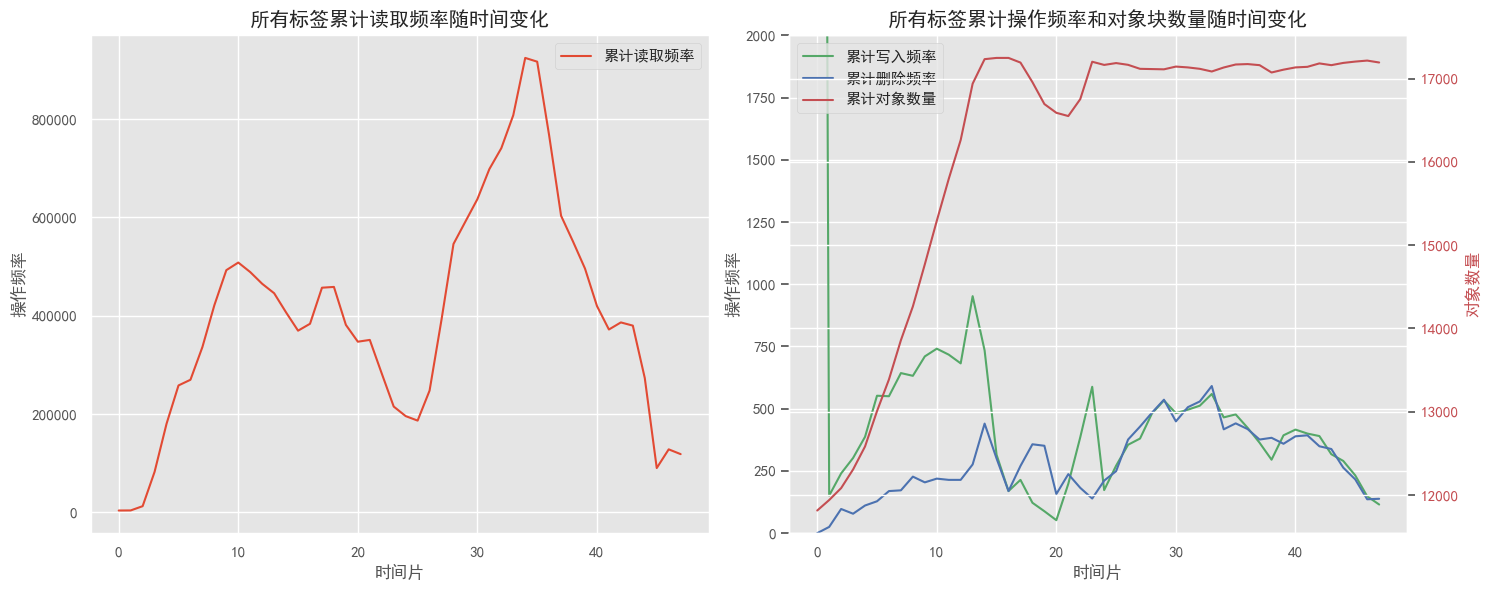

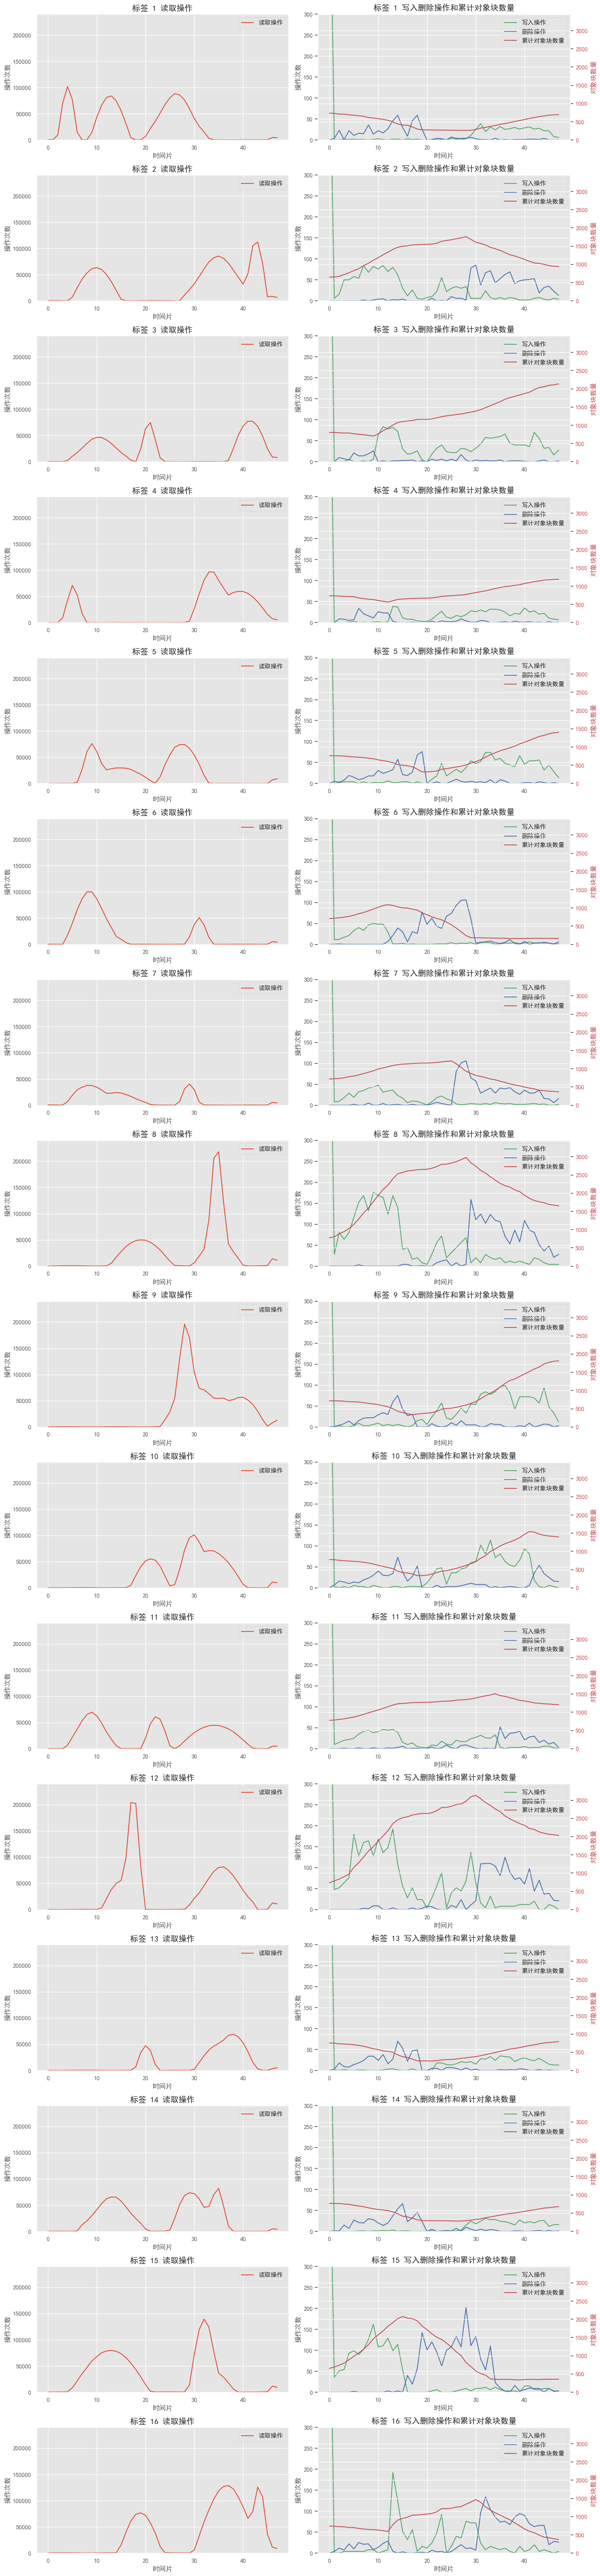

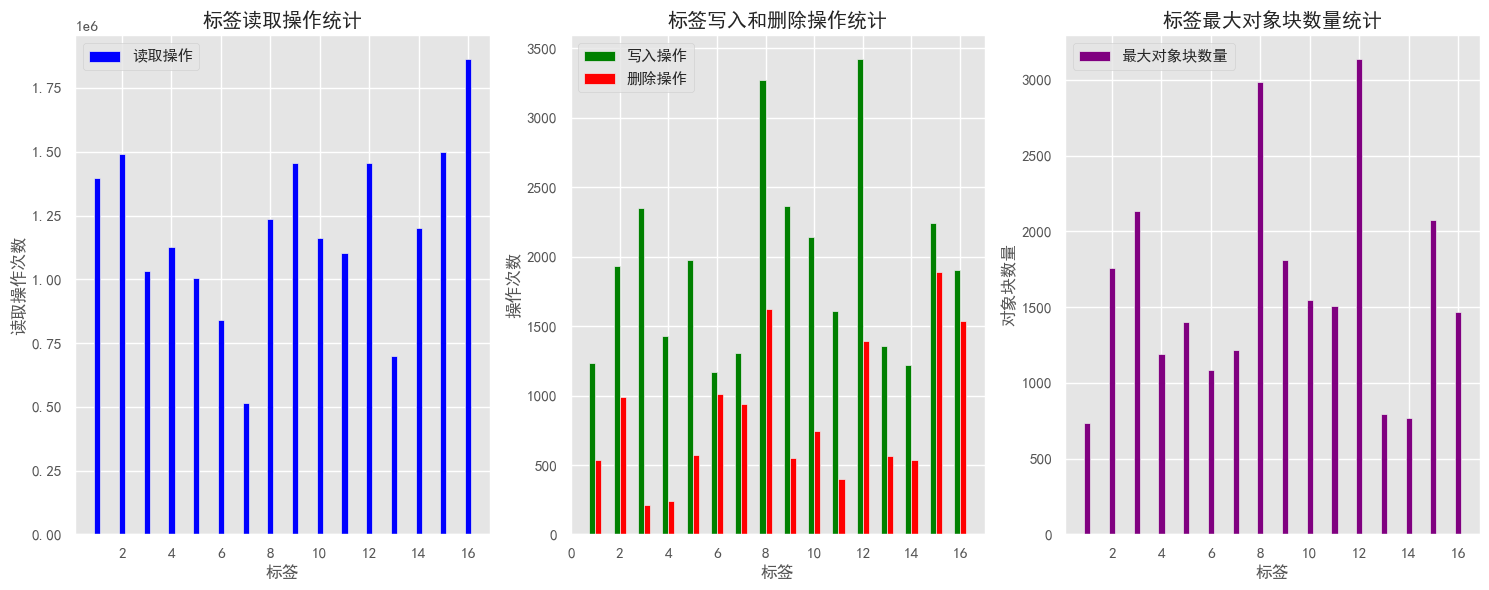

In [4]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 读取文件
f =  open('../run/sample_official.in', 'r')
line = f.readline()

# 解析第一行参数
T, M, N, V, G = map(int, line.strip().split())

tag_ops = {i: {'read': [], 'write': [], 'delete': [],'obj_count': []} for i in range(1, M+1)}

#删除操作
for i in range(1, M+1):
    line = f.readline()
    del_cnt = map(int, line.strip().split())
    tag_ops[i]['delete'] = np.array(list(del_cnt))
# 写入操作
for i in range(1, M+1):
    line = f.readline()
    write_cnt = map(int, line.strip().split())
    tag_ops[i]['write'] = np.array(list(write_cnt))
# 读取操作  
for i in range(1, M+1):
    line = f.readline()
    read_cnt = map(int, line.strip().split())
    tag_ops[i]['read'] = np.array(list(read_cnt))
# 累计对象数量

for i in range(1, M+1):
    tag_ops[i]['obj_count'].append(tag_ops[i]['write'][0]-tag_ops[i]['delete'][0])
    for j in range(1, len(tag_ops[i]['write'])):
        tag_ops[i]['obj_count'].append(tag_ops[i]['obj_count'][j-1]+tag_ops[i]['write'][j]-tag_ops[i]['delete'][j])
# 计算各标签累加的总频率
cumulative_read = np.zeros(len(tag_ops[1]['read']))
cumulative_write = np.zeros(len(tag_ops[1]['write']))
cumulative_delete = np.zeros(len(tag_ops[1]['delete']))
cumulative_obj = np.zeros(len(tag_ops[1]['read']))

x = np.arange(0, len(tag_ops[1]['read']),1)

# 计算每个时间片的累加频率
for t in range(0, len(tag_ops[1]['read'])):
    for i in range(1, M+1):
        cumulative_read[t] += tag_ops[i]['read'][t]
        cumulative_write[t] += tag_ops[i]['write'][t]
        cumulative_delete[t] += tag_ops[i]['delete'][t]
        cumulative_obj[t] += tag_ops[i]['obj_count'][t]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 绘制累加读取频率图
ax1.plot(x,cumulative_read, label='累计读取频率')
ax1.set_xlabel('时间片')
ax1.set_ylabel('操作频率')
ax1.set_title('所有标签累计读取频率随时间变化')
ax1.legend()
ax1.grid(True)

# 绘制累加写入删除频率图和累计对象数量图（双Y轴）
ax2_1 = ax2
ax2_2 = ax2.twinx() 

# 写入和删除频率使用左侧Y轴
ax2_1.plot(x, cumulative_write, 'g-', label='累计写入频率')
ax2_1.plot(x, cumulative_delete, 'b-', label='累计删除频率')
ax2_1.set_xlabel('时间片')
ax2_1.set_ylabel('操作频率')
ax2_1.tick_params(axis='y')
ax2_1.set_ylim(0, 2000)

# 对象数量使用右侧Y轴
ax2_2.plot(x, cumulative_obj, 'r-', label='累计对象数量')
ax2_2.set_ylabel('对象数量', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# 合并图例
lines1, labels1 = ax2_1.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax2.set_title('所有标签累计操作频率和对象块数量随时间变化')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 确定所有标签的统一纵轴范围
max_read = max([max(tag_ops[i]['read']) for i in range(1, M+1)])
max_write_delete = max([max(max(tag_ops[i]['write']), max(tag_ops[i]['delete'])) for i in range(1, M+1)])
max_obj_count = max([max(tag_ops[i]['obj_count']) for i in range(1, M+1)])

# 绘制折线图
fig, axes = plt.subplots(M, 2, figsize=(15, 4*M))

for i in range(1, M+1):
    # 左侧子图显示读取操作
    axes[i-1,0].plot(x, tag_ops[i]['read'], label='读取操作')
    axes[i-1,0].set_title(f'标签 {i} 读取操作')
    axes[i-1,0].set_xlabel('时间片')
    axes[i-1,0].set_ylabel('操作次数')
    axes[i-1,0].set_ylim(0, max_read*1.1)  # 统一纵轴范围
    axes[i-1,0].grid(True)
    axes[i-1,0].legend()
    
    # 右侧子图显示写入、删除操作和累计对象数量（双Y轴）
    ax_right = axes[i-1,1]
    ax_right_twin = ax_right.twinx()  # 创建共享x轴的第二个y轴
    
    # 写入和删除操作使用左侧Y轴
    ax_right.plot(x, tag_ops[i]['write'], 'g-', label='写入操作')
    ax_right.plot(x, tag_ops[i]['delete'], 'b-', label='删除操作')
    ax_right.set_title(f'标签 {i} 写入删除操作和累计对象块数量')
    ax_right.set_xlabel('时间片')
    ax_right.set_ylabel('操作次数')
    ax_right.tick_params(axis='y')
    ax_right.set_ylim(0, 300)  # 统一纵轴范围
    
    # 累计对象数量使用右侧Y轴
    ax_right_twin.plot(x, tag_ops[i]['obj_count'], 'r-', label='累计对象块数量')
    ax_right_twin.set_ylabel('对象块数量', color='r')
    ax_right_twin.tick_params(axis='y', labelcolor='r')
    ax_right_twin.set_ylim(0, max_obj_count*1.1)  # 统一纵轴范围
    
    # 合并图例
    lines1, labels1 = ax_right.get_legend_handles_labels()
    lines2, labels2 = ax_right_twin.get_legend_handles_labels()
    ax_right.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    ax_right.grid(True)

plt.tight_layout()
plt.show()

# 计算每个标签的总操作次数
read_ops = [sum(tag_ops[i]['read']) for i in range(1, M+1)]
write_ops = [sum(tag_ops[i]['write']) for i in range(1, M+1)]
delete_ops = [sum(tag_ops[i]['delete']) for i in range(1, M+1)]
obj_count = [max(tag_ops[i]['obj_count']) for i in range(1, M+1)]

x = range(1, M+1)
width = 0.25

# 创建三个子图
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# 读取操作图
ax1.bar(x, read_ops, width, label='读取操作', color='blue')
ax1.set_xlabel('标签')
ax1.set_ylabel('读取操作次数')
ax1.set_title('标签读取操作统计')
ax1.legend()
ax1.grid(True)

# 写入操作图
ax2.bar([i - width/2 for i in x], write_ops, width, label='写入操作', color='green')
ax2.bar([i + width/2 for i in x], delete_ops, width, label='删除操作', color='red')
ax2.set_xlabel('标签')
ax2.set_ylabel('操作次数')
ax2.set_title('标签写入和删除操作统计')
ax2.legend()
ax2.grid(True)

# 最大对象数量图
ax3.bar(x, obj_count, width, label='最大对象块数量', color='purple')
ax3.set_xlabel('标签')
ax3.set_ylabel('对象块数量')
ax3.set_title('标签最大对象块数量统计')
ax3.legend()

plt.tight_layout()
plt.show()


## 读取输入文件

首先读取sample_practice.in文件并解析其内容

In [5]:
# 定义函数用于解析输入文件
def parse_input(filepath):
    objects = {}  # 存储所有对象信息：{obj_id: {'birth': timestamp, 'death': timestamp, 'size': size, 'tag': tag}}
    object_operations = []  # 存储对象操作序列：[(timestamp, operation, obj_id, obj_size, obj_tag), ...]
    
    with open(filepath, 'r') as f:
        # 读取第一行基本参数
        T, M, N, V, G = map(int, f.readline().strip().split())
        
        # 跳过频率数组（3*M行）
        for _ in range(3*M):
            f.readline()
        
        # 处理每个时间片的输入
        current_timestamp = 0
        
        # 最多读取T+10^5个时间片或直到文件结束
        while current_timestamp < T + 105:
            line = f.readline().strip()
            if not line:  # 文件结束
                break
                
            # 时间片对齐事件
            if line.startswith("TIMESTAMP"):
                current_timestamp = int(line.split()[1])
                
                # 对象删除事件
                n_delete = int(f.readline().strip())
                for _ in range(n_delete):
                    obj_id = int(f.readline().strip())
                    if obj_id in objects:
                        objects[obj_id]['death'] = current_timestamp
                        object_operations.append((current_timestamp, 'delete', obj_id, objects[obj_id]['size'], objects[obj_id]['tag']))
                
                # 对象写入事件
                n_write = int(f.readline().strip())
                for _ in range(n_write):
                    obj_info = f.readline().strip().split()
                    obj_id, obj_size, obj_tag = map(int, obj_info)
                    objects[obj_id] = {
                        'birth': current_timestamp,
                        'death': None,  # 初始设为None，表示对象尚未删除
                        'size': obj_size,
                        'tag': obj_tag
                    }
                    object_operations.append((current_timestamp, 'write', obj_id, obj_size, obj_tag))
                
                # 对象读取事件
                n_read = int(f.readline().strip())
                for _ in range(n_read):
                    req_info = f.readline().strip().split()
                    req_id, obj_id = map(int, req_info)
                    if obj_id in objects:
                        object_operations.append((current_timestamp, 'read', obj_id, objects[obj_id]['size'], objects[obj_id]['tag']))
    
    # 处理那些在最后还没有被删除的对象
    for obj_id, obj_info in objects.items():
        if obj_info['death'] is None:
            obj_info['death'] = T + 105  # 设置为最大时间片
    
    return T, M, N, V, G, objects, object_operations

# 解析输入文件
filepath = '../run/sample_official.in'
T, M, N, V, G, objects, object_operations = parse_input(filepath)

print(f"总时间片数: {T}")
print(f"对象标签数: {M}")
print(f"硬盘数: {N}")
print(f"每个硬盘的存储单元数: {V}")
print(f"每个磁头每时间片的最大令牌数: {G}")
print(f"总对象数: {len(objects)}")

总时间片数: 86400
对象标签数: 16
硬盘数: 10
每个硬盘的存储单元数: 5754
每个磁头每时间片的最大令牌数: 350
总对象数: 14453


## 计算对象生命周期

对于每个对象，计算其生命周期（从创建到删除的时间跨度）

In [6]:
# 计算对象生命周期
lifecycle_data = []
for obj_id, obj_info in objects.items():
    lifecycle = obj_info['death'] - obj_info['birth']
    lifecycle_data.append({
        'obj_id': obj_id,
        'birth': obj_info['birth'],
        'death': obj_info['death'],
        'lifecycle': lifecycle,
        'size': obj_info['size'],
        'tag': obj_info['tag']
    })

# 转换为DataFrame以便于分析
df_lifecycle = pd.DataFrame(lifecycle_data)

# 显示基本统计信息
print("所有对象生命周期统计：")
print(df_lifecycle['lifecycle'].describe())

# 按标签分组统计生命周期
tag_lifecycle_stats = df_lifecycle.groupby('tag')['lifecycle'].describe()
print("\n按标签分组的生命周期统计：")
print(tag_lifecycle_stats)

所有对象生命周期统计：
count    14453.000000
mean     43046.168754
std      26342.327363
min         36.000000
25%      21655.000000
50%      36885.000000
75%      65377.000000
max      86504.000000
Name: lifecycle, dtype: float64

按标签分组的生命周期统计：
      count          mean           std     min       25%      50%       75%  \
tag                                                                            
1     802.0  28418.082294  23633.866672   137.0  13029.75  22672.5  30980.75   
2     938.0  56212.236674  22395.302706   746.0  41246.50  60460.5  73479.75   
3    1117.0  46141.588183  29229.371823   122.0  19861.00  42848.0  84402.00   
4    1011.0  41370.416419  28347.734954   109.0  17505.50  31949.0  62176.50   
5     931.0  30636.671321  23239.494917   841.0  14962.50  25577.0  34534.00   
6     760.0  36653.736842  19357.240206    36.0  25202.50  34193.0  46173.25   
7     921.0  50911.196526  21936.633441   573.0  35255.00  51063.0  67097.00   
8     971.0  58414.640577  21738.014228   155

## 对象生命周期分布

1. 全部对象的生命周期分布
2. 各个标签对象的生命周期分布

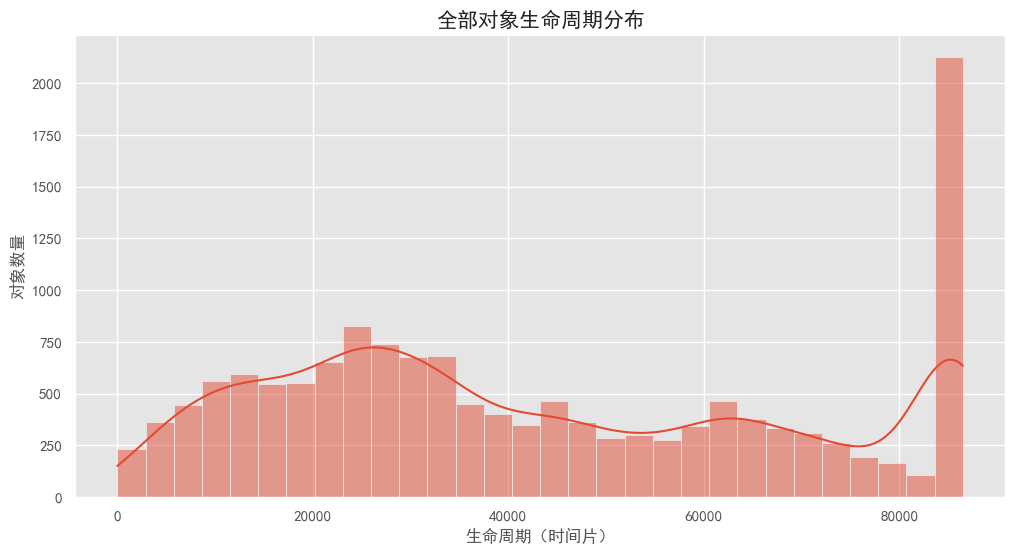

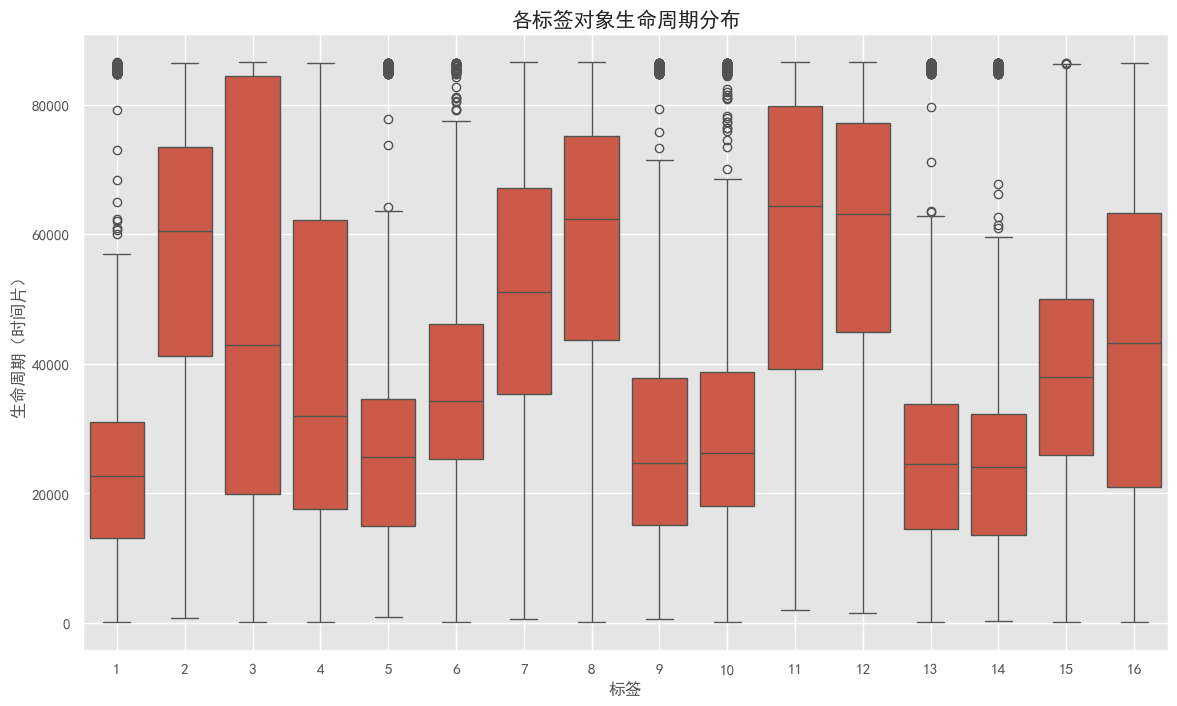

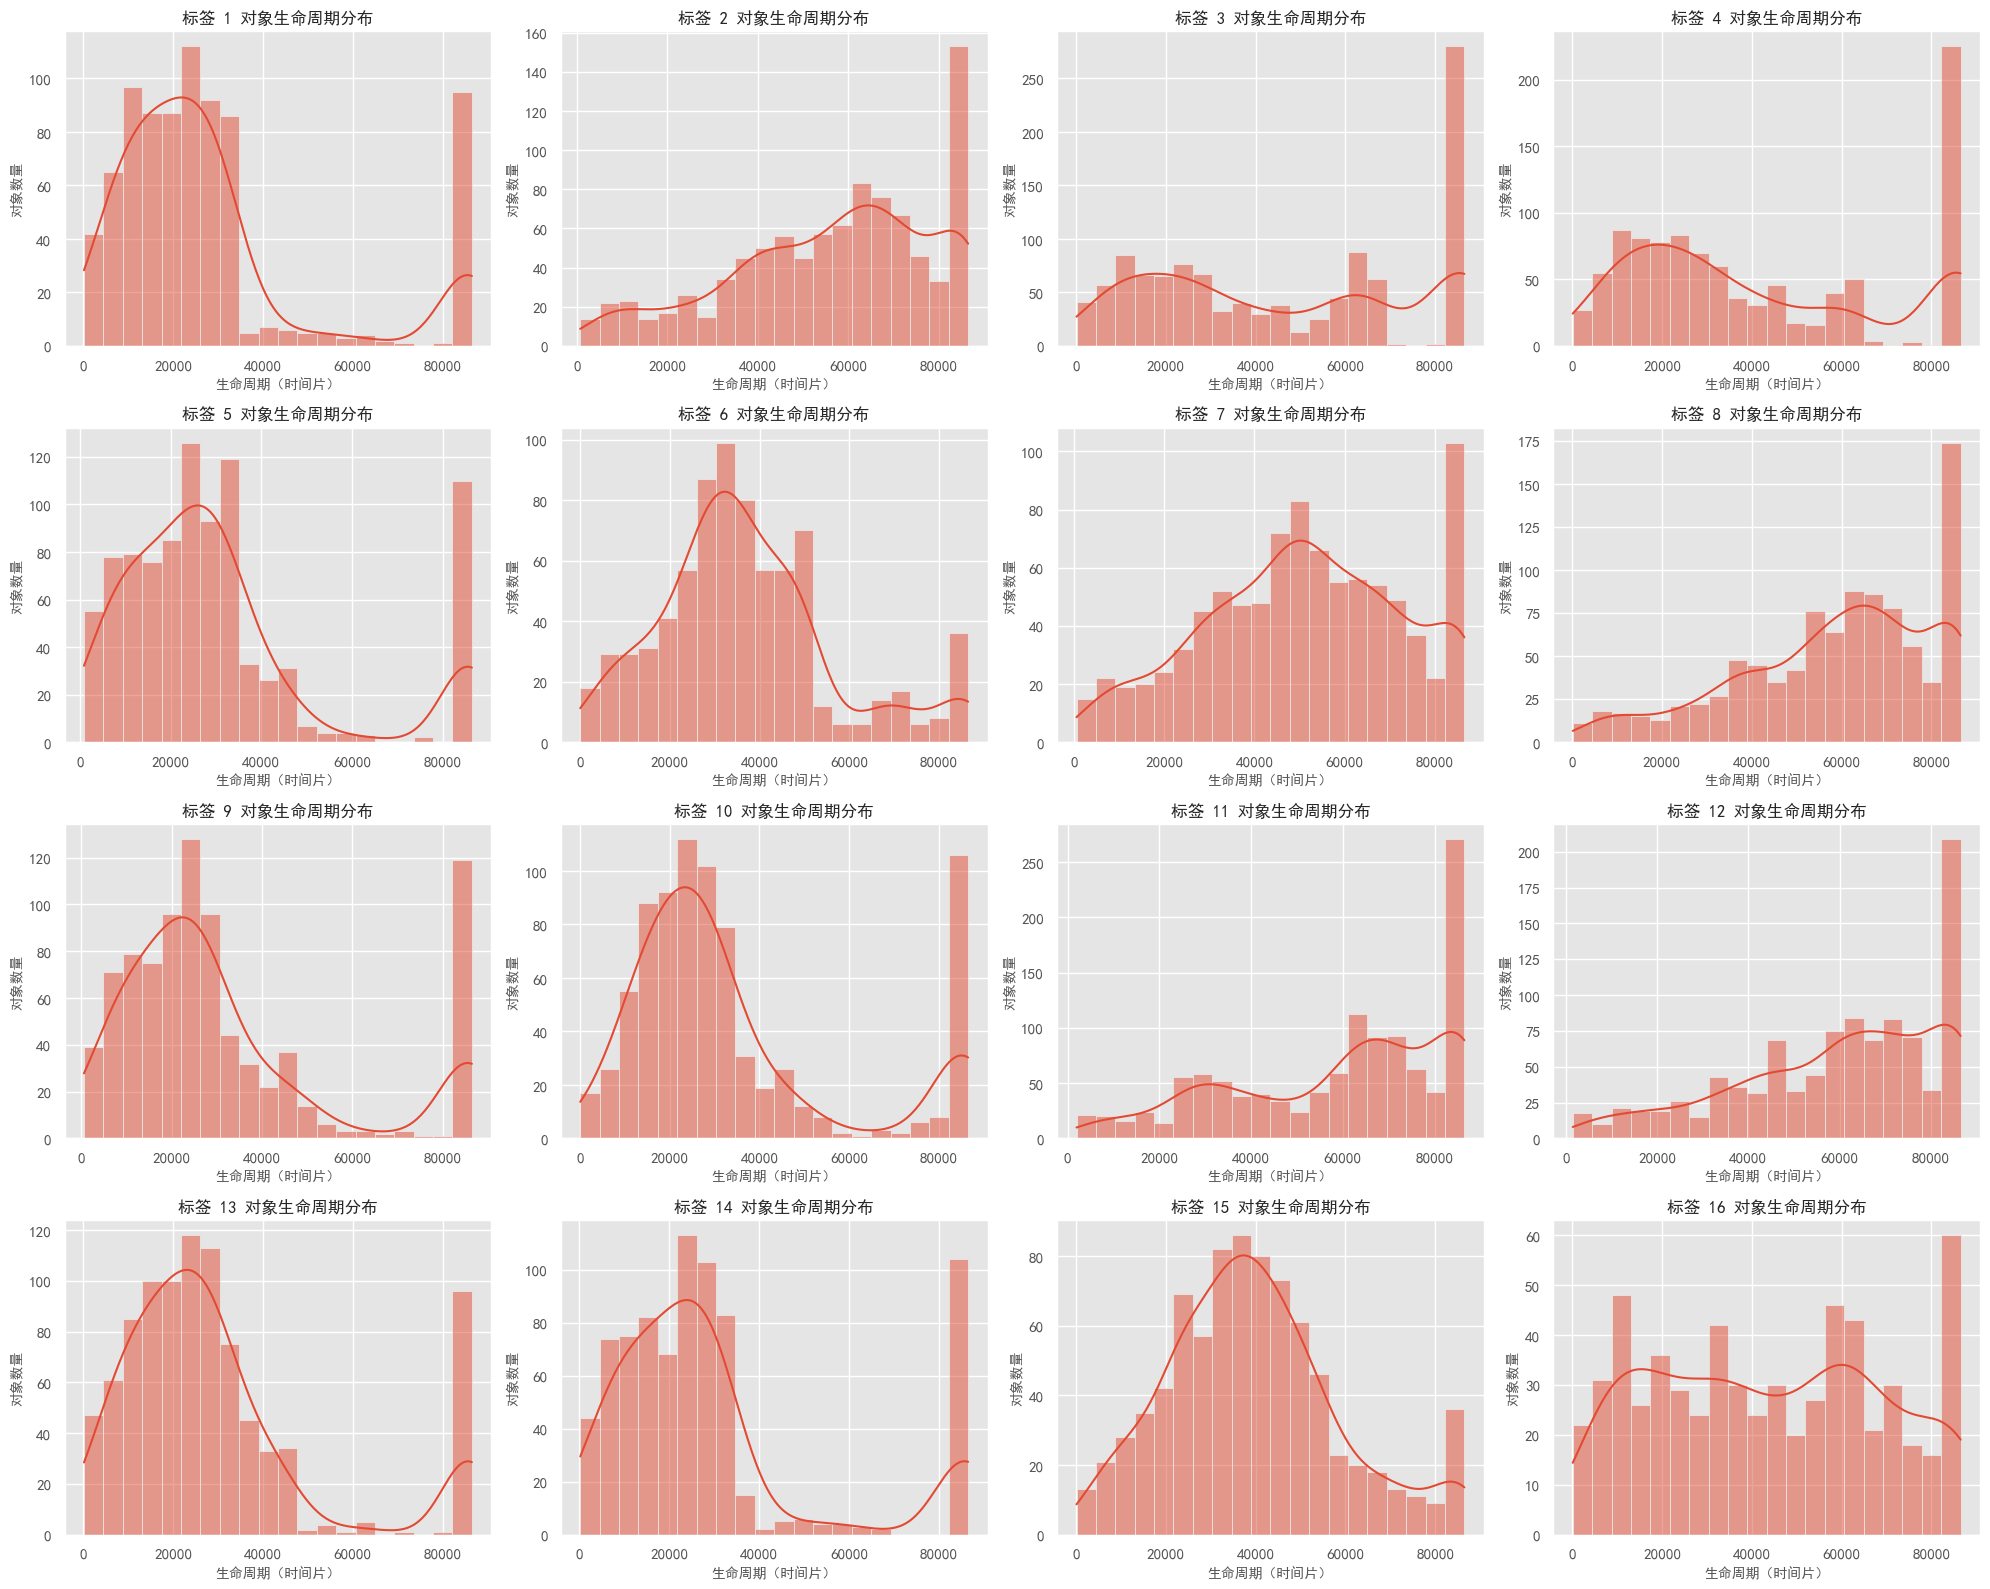

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制全部对象的生命周期分布直方图
plt.figure(figsize=(12, 6))
sns.histplot(df_lifecycle['lifecycle'], bins=30, kde=True)
plt.title('全部对象生命周期分布', fontsize=15)
plt.xlabel('生命周期（时间片）', fontsize=12)
plt.ylabel('对象数量', fontsize=12)
plt.grid(True)
# plt.savefig('all_object_lifecycle_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 绘制各个标签对象的生命周期箱型图
plt.figure(figsize=(14, 8))
sns.boxplot(x='tag', y='lifecycle', data=df_lifecycle)
plt.title('各标签对象生命周期分布', fontsize=15)
plt.xlabel('标签', fontsize=12)
plt.ylabel('生命周期（时间片）', fontsize=12)
plt.grid(True)
# plt.savefig('tag_lifecycle_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 为每个标签绘制生命周期分布
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for i in range(1, M+1):
    tag_data = df_lifecycle[df_lifecycle['tag'] == i]
    sns.histplot(tag_data['lifecycle'], bins=20, kde=True, ax=axs[i-1])
    axs[i-1].set_title(f'标签 {i} 对象生命周期分布', fontsize=12)
    axs[i-1].set_xlabel('生命周期（时间片）', fontsize=10)
    axs[i-1].set_ylabel('对象数量', fontsize=10)
    axs[i-1].grid(True)

plt.tight_layout()
# plt.savefig('tag_lifecycle_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 各标签平均生命周期随时间变化

统计每1800个时间片区间的平均生命周期

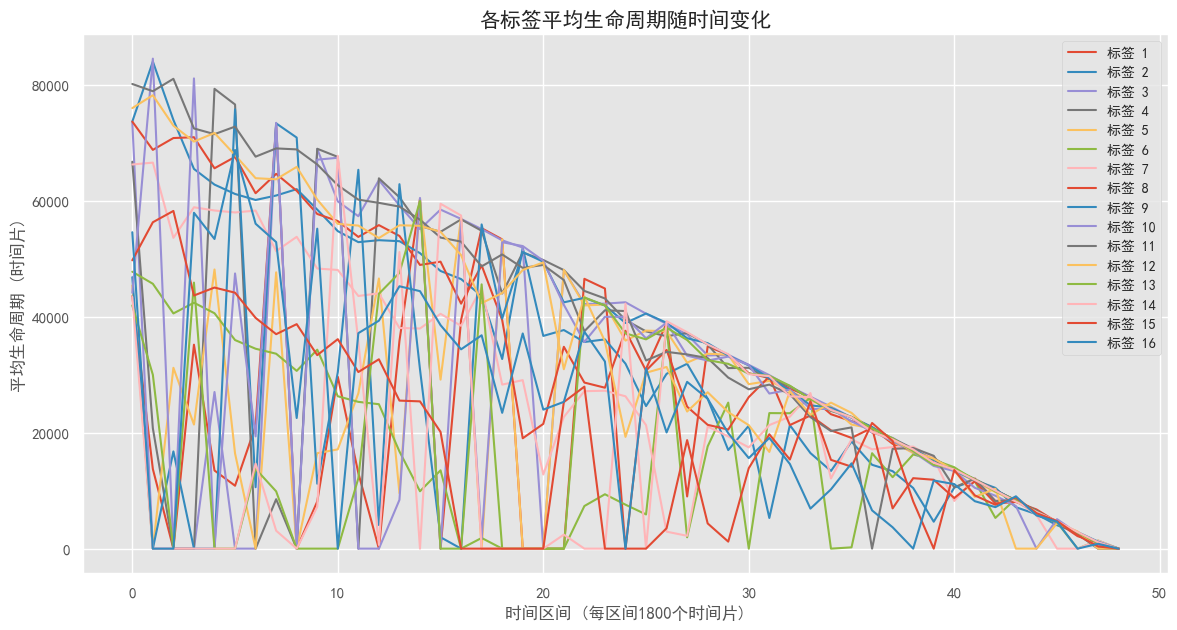

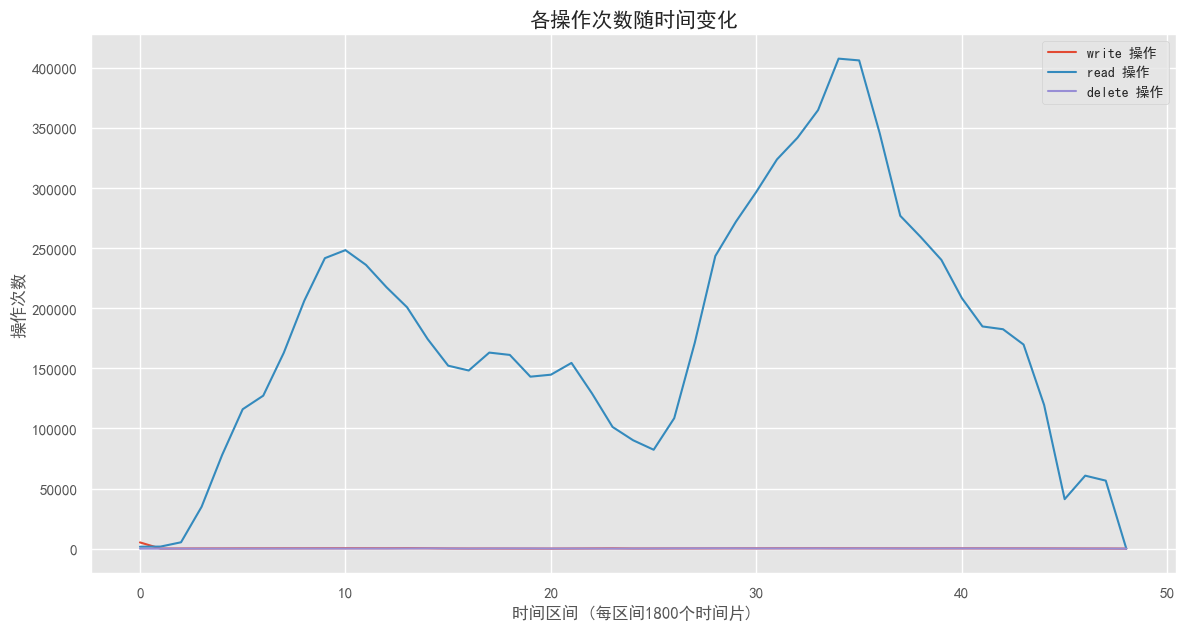

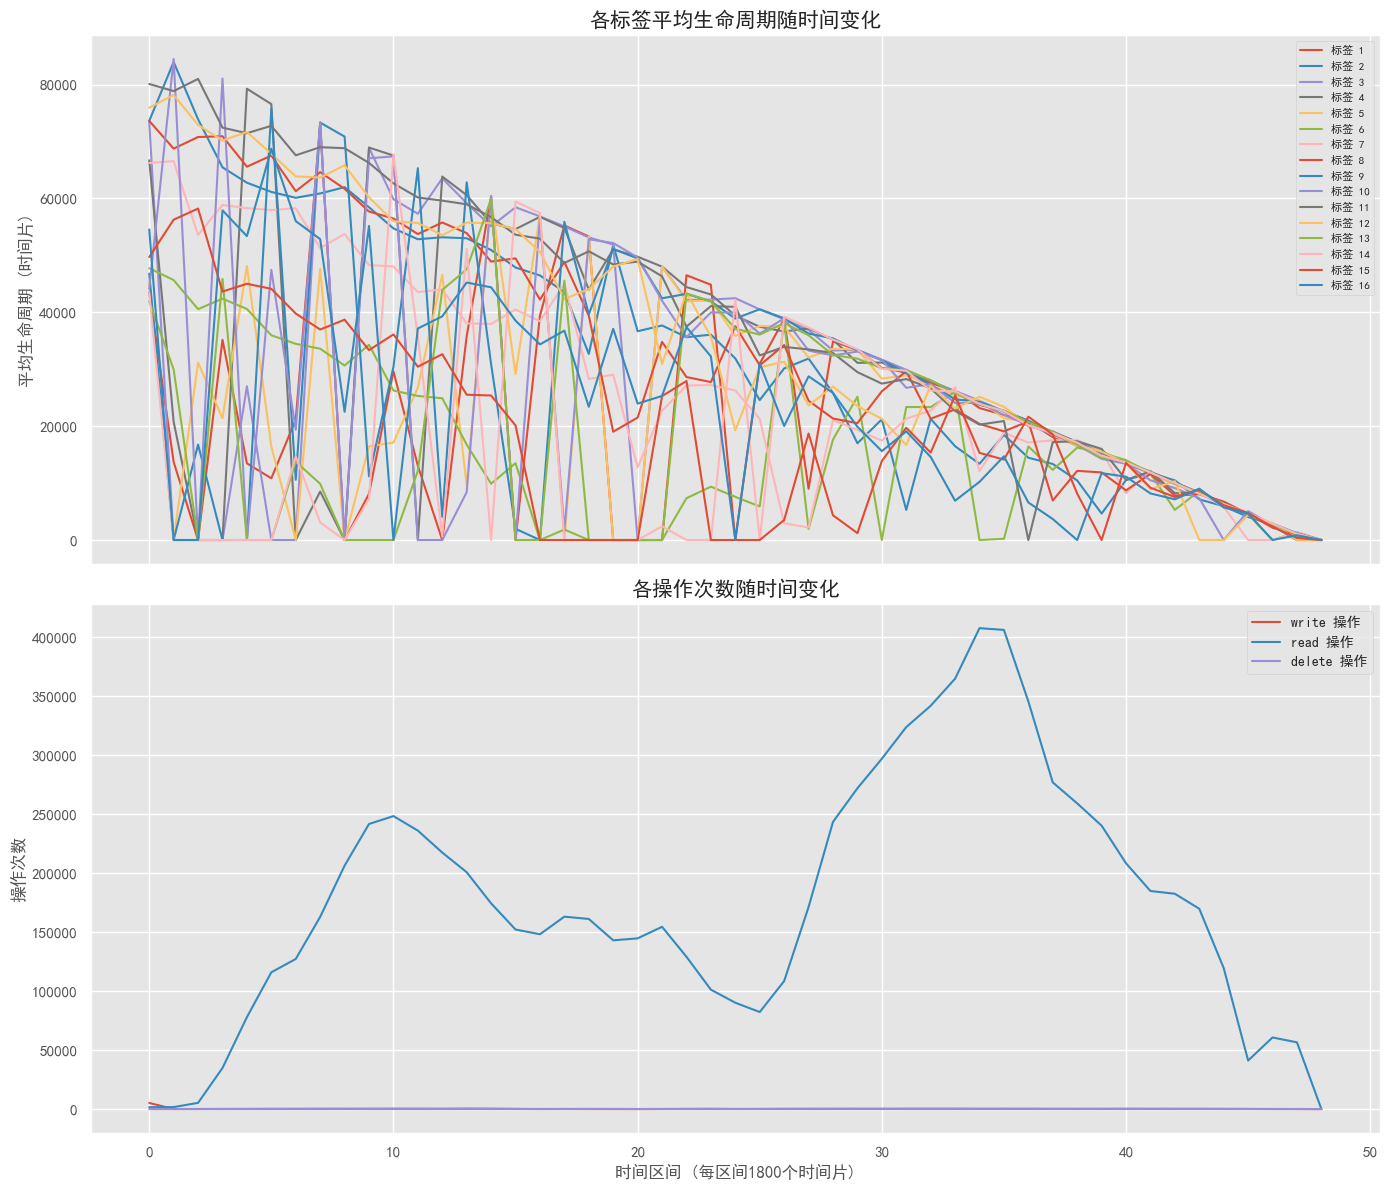

In [8]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 定义时间片区间
interval_size = 1800
num_intervals = (T + 105) // interval_size + 1
intervals = [(i*interval_size, min((i+1)*interval_size, T+105)) for i in range(num_intervals)]

# 初始化数据结构
tag_interval_lifecycles = {tag: {i: [] for i in range(num_intervals)} for tag in range(1, M+1)}
interval_operations = {op: {i: 0 for i in range(num_intervals)} for op in ['write', 'read', 'delete']}

# 统计每个区间内创建对象的生命周期
for _, row in df_lifecycle.iterrows():
    birth_interval = row['birth'] // interval_size
    if birth_interval < num_intervals:
        tag_interval_lifecycles[row['tag']][birth_interval].append(row['lifecycle'])

# 计算每个标签在每个区间内创建对象的平均生命周期
tag_interval_avg_lifecycle = {}
for tag in range(1, M+1):
    tag_interval_avg_lifecycle[tag] = []
    for i in range(num_intervals):
        lifecycles = tag_interval_lifecycles[tag][i]
        if lifecycles:
            avg_lifecycle = sum(lifecycles) / len(lifecycles)
        else:
            avg_lifecycle = 0
        tag_interval_avg_lifecycle[tag].append(avg_lifecycle)

# 统计每个区间的操作数量
for op in object_operations:
    timestamp, operation, _, _, _ = op
    interval = timestamp // interval_size
    if interval < num_intervals:
        interval_operations[operation][interval] += 1

# 绘制各标签平均生命周期随时间变化图
plt.figure(figsize=(14, 7))
x = [i for i in range(num_intervals)]
for tag in range(1, M+1):
    plt.plot(x, tag_interval_avg_lifecycle[tag], label=f'标签 {tag}')

plt.title('各标签平均生命周期随时间变化', fontsize=15)
plt.xlabel('时间区间 (每区间1800个时间片)', fontsize=12)
plt.ylabel('平均生命周期 (时间片)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
# plt.savefig('tag_avg_lifecycle_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# 绘制操作数量随时间变化图
plt.figure(figsize=(14, 7))
for op in ['write', 'read', 'delete']:
    operation_counts = [interval_operations[op][i] for i in range(num_intervals)]
    plt.plot(x, operation_counts, label=f'{op} 操作')

plt.title('各操作次数随时间变化', fontsize=15)
plt.xlabel('时间区间 (每区间1800个时间片)', fontsize=12)
plt.ylabel('操作次数', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
# plt.savefig('operations_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# 绘制平均生命周期与操作数量对比图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# 上半部分：各标签平均生命周期
for tag in range(1, M+1):
    ax1.plot(x, tag_interval_avg_lifecycle[tag], label=f'标签 {tag}')
ax1.set_title('各标签平均生命周期随时间变化', fontsize=15)
ax1.set_ylabel('平均生命周期 (时间片)', fontsize=12)
ax1.legend(loc='best', fontsize=8)
ax1.grid(True)

# 下半部分：操作数量
for op in ['write', 'read', 'delete']:
    operation_counts = [interval_operations[op][i] for i in range(num_intervals)]
    ax2.plot(x, operation_counts, label=f'{op} 操作')
ax2.set_title('各操作次数随时间变化', fontsize=15)
ax2.set_xlabel('时间区间 (每区间1800个时间片)', fontsize=12)
ax2.set_ylabel('操作次数', fontsize=12)
ax2.legend(loc='best', fontsize=10)
ax2.grid(True)

plt.tight_layout()
# plt.savefig('lifecycle_operations_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 对象长度分布

1. 全部对象的长度分布
2. 各个标签对象的长度分布

[[], [0.74563, 0.08354, 0.08603, 0.0586, 0.02618], [0.11407, 0.76972, 0.07675, 0.02452, 0.01492], [0.10205, 0.76991, 0.07162, 0.0376, 0.0188], [0.78931, 0.0811, 0.07517, 0.03659, 0.0178], [0.1203, 0.73147, 0.08055, 0.04511, 0.02255], [0.72894, 0.10526, 0.09078, 0.05131, 0.02368], [0.77198, 0.09554, 0.08577, 0.03691, 0.00977], [0.12564, 0.0968, 0.07518, 0.68692, 0.01544], [0.13203, 0.09988, 0.70952, 0.04247, 0.01607], [0.13081, 0.1283, 0.67924, 0.04402, 0.01761], [0.81143, 0.06911, 0.06484, 0.04522, 0.00938], [0.11881, 0.099, 0.07425, 0.69108, 0.01683], [0.76221, 0.08577, 0.08686, 0.04668, 0.01845], [0.72935, 0.09275, 0.10165, 0.05209, 0.02414], [0.12636, 0.08869, 0.72782, 0.0486, 0.0085], [0.19101, 0.13001, 0.14125, 0.50561, 0.0321]]


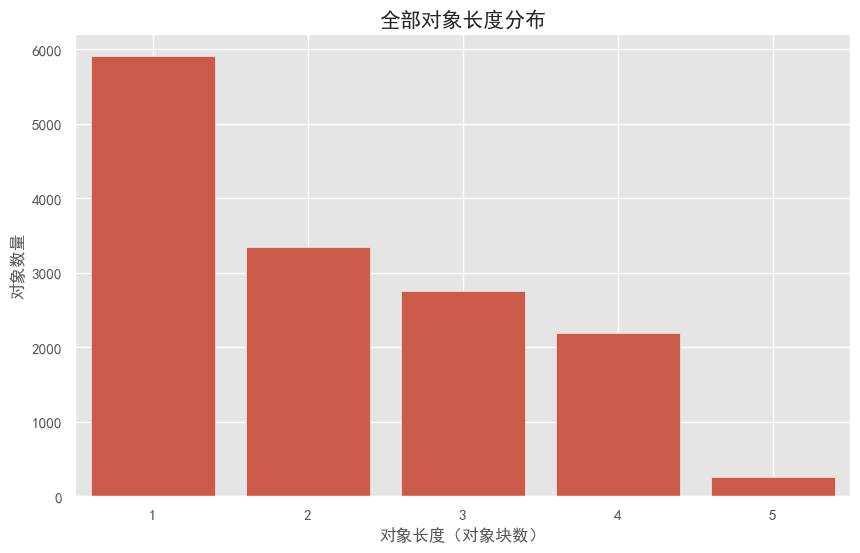

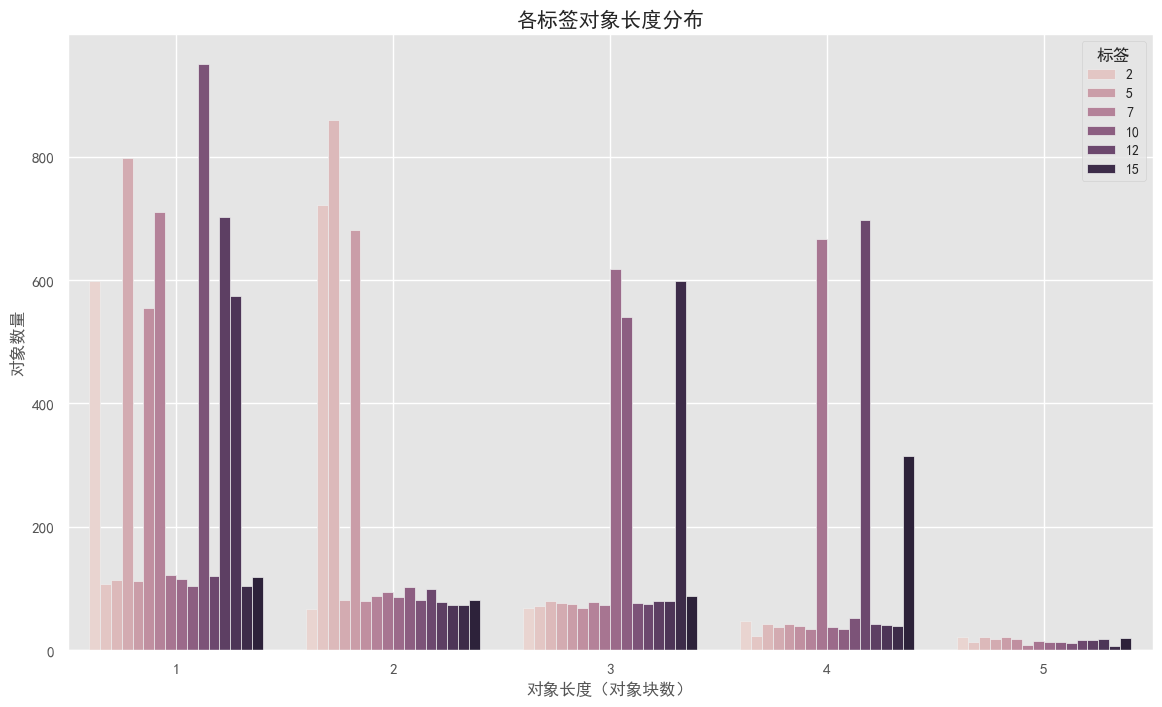

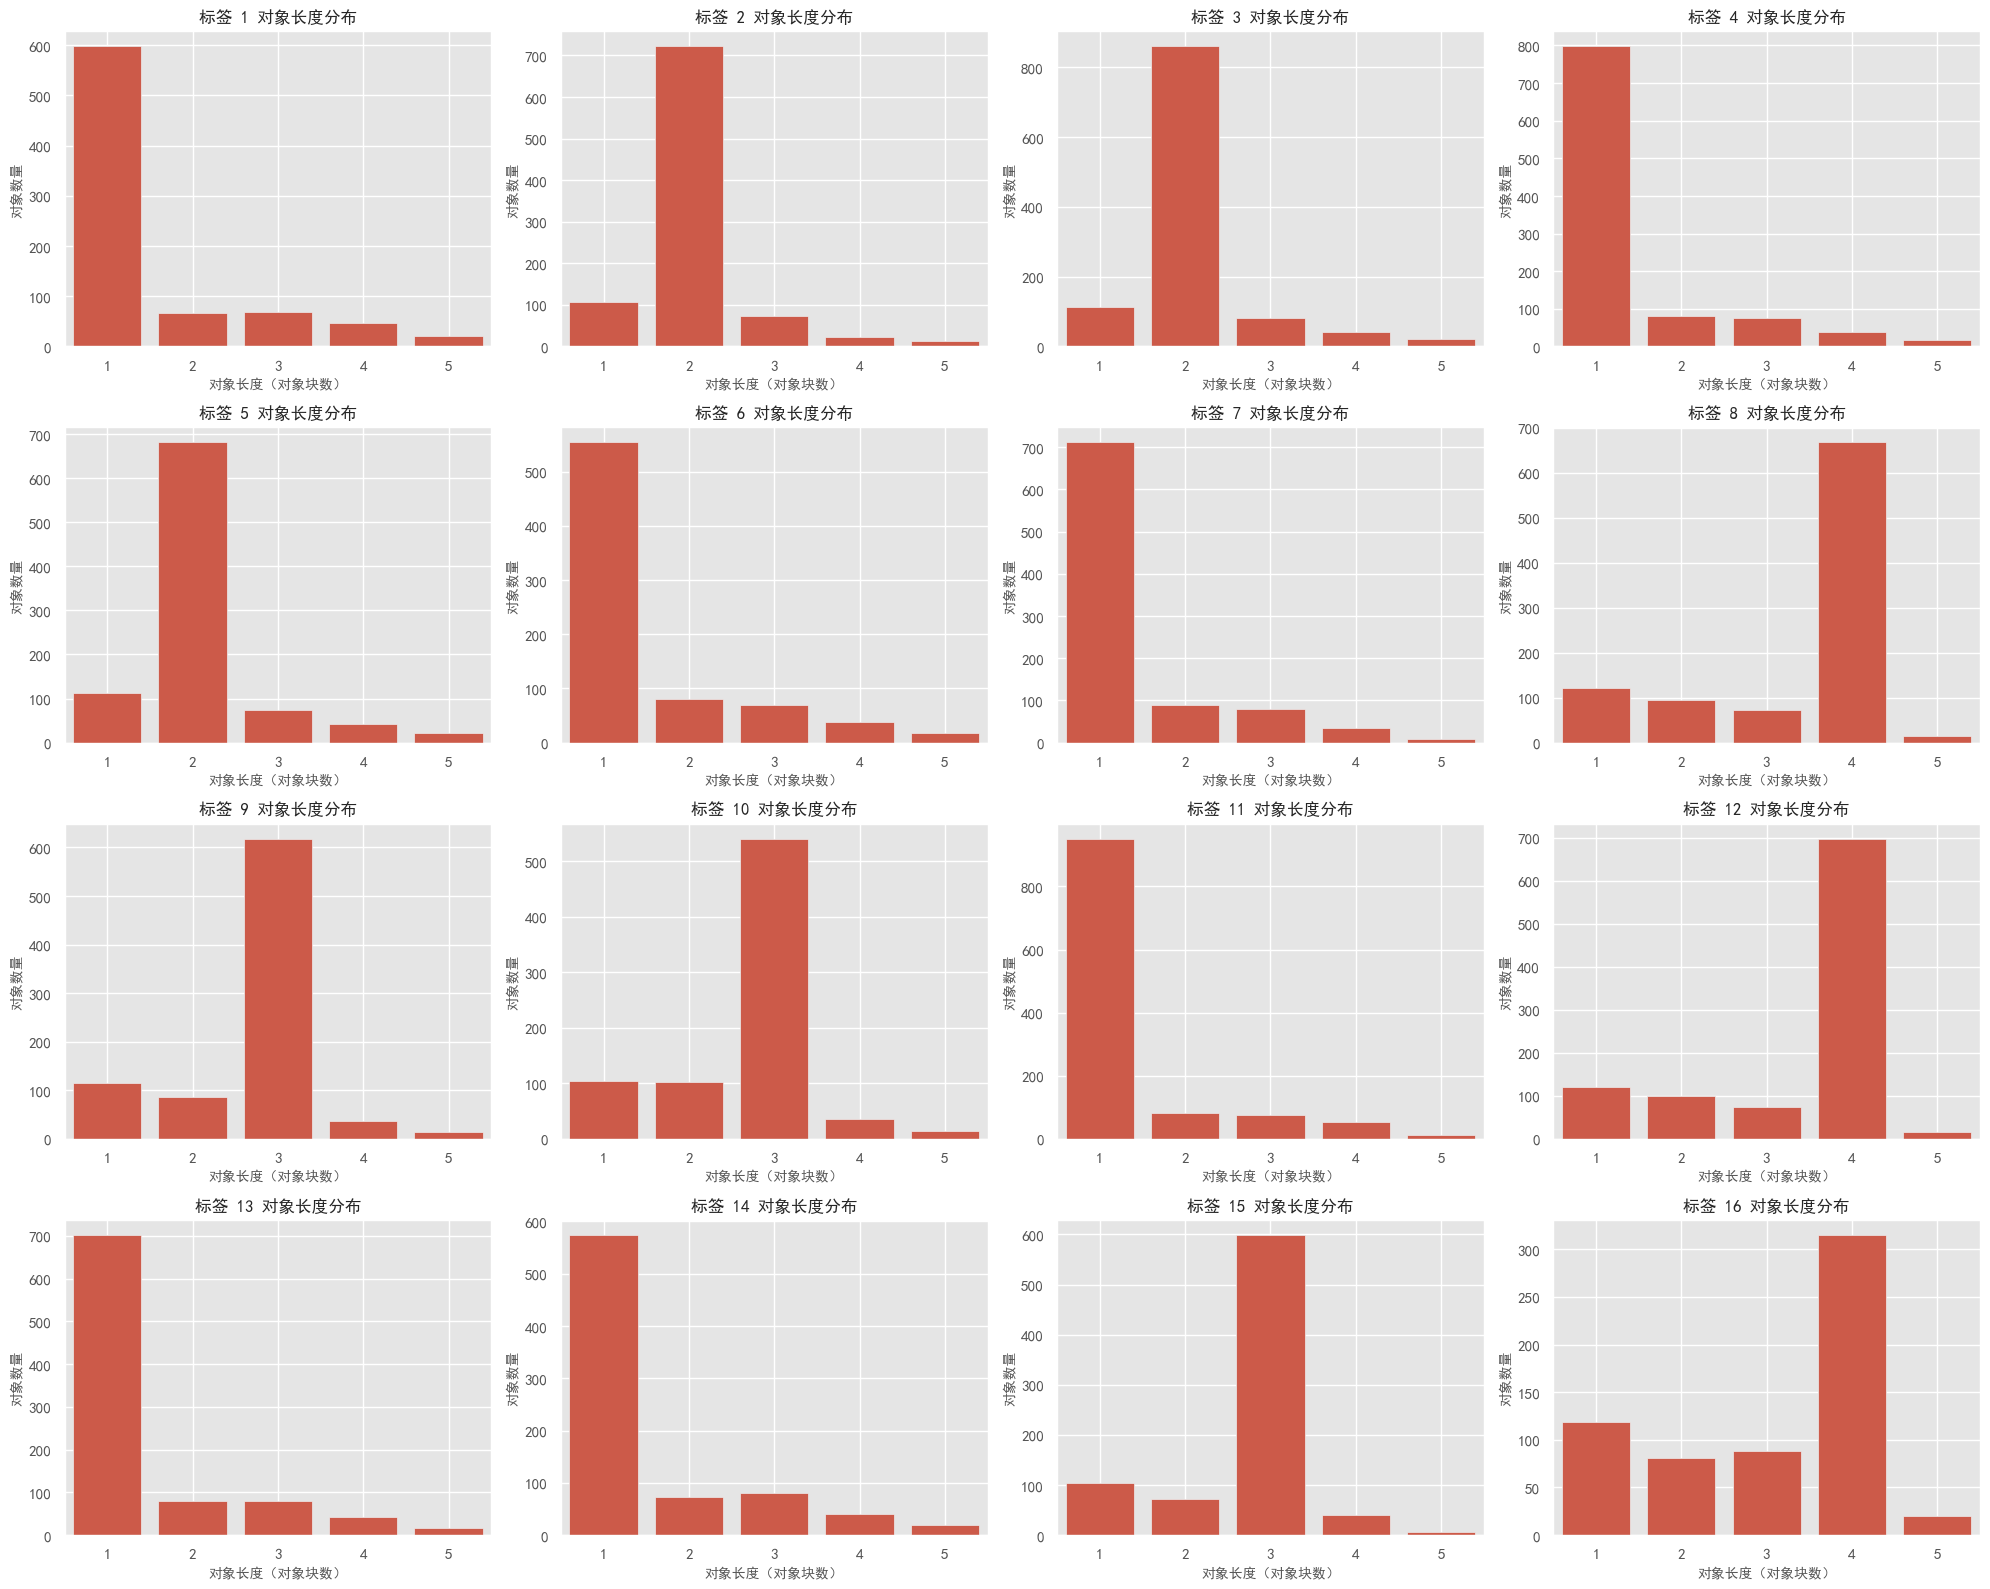

In [9]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建二层列表存储各标签的文件大小分布
size_distribution = [[] for _ in range(M+1)]

# 统计各标签的文件大小分布
for i in range(1, M+1):
    tag_data = df_lifecycle[df_lifecycle['tag'] == i]
    size_counts = tag_data['size'].value_counts().sort_index()
    size_distribution[i] = size_counts.tolist()

size_distribution = [[_/sum(__)*10e4//1/10e4 for _ in __] for __ in size_distribution ]


# 直接打印二层列表
print(size_distribution)

# 保留原有的可视化代码
# 绘制全部对象的长度分布
plt.figure(figsize=(10, 6))
sns.countplot(x='size', data=df_lifecycle)
plt.title('全部对象长度分布', fontsize=15)
plt.xlabel('对象长度（对象块数）', fontsize=12)
plt.ylabel('对象数量', fontsize=12)
plt.grid(True)
# plt.savefig('all_object_size_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 绘制各标签对象的长度分布
plt.figure(figsize=(14, 8))
sns.countplot(x='size', hue='tag', data=df_lifecycle)
plt.title('各标签对象长度分布', fontsize=15)
plt.xlabel('对象长度（对象块数）', fontsize=12)
plt.ylabel('对象数量', fontsize=12)
plt.legend(title='标签', fontsize=10)
plt.grid(True)
# plt.savefig('tag_size_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 为每个标签绘制对象长度分布
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for i in range(1, M+1):
    tag_data = df_lifecycle[df_lifecycle['tag'] == i]
    sns.countplot(x='size', data=tag_data, ax=axs[i-1])
    axs[i-1].set_title(f'标签 {i} 对象长度分布', fontsize=12)
    axs[i-1].set_xlabel('对象长度（对象块数）', fontsize=10)
    axs[i-1].set_ylabel('对象数量', fontsize=10)
    axs[i-1].grid(True)

plt.tight_layout()
# plt.savefig('tag_size_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 生命周期与对象大小关系分析

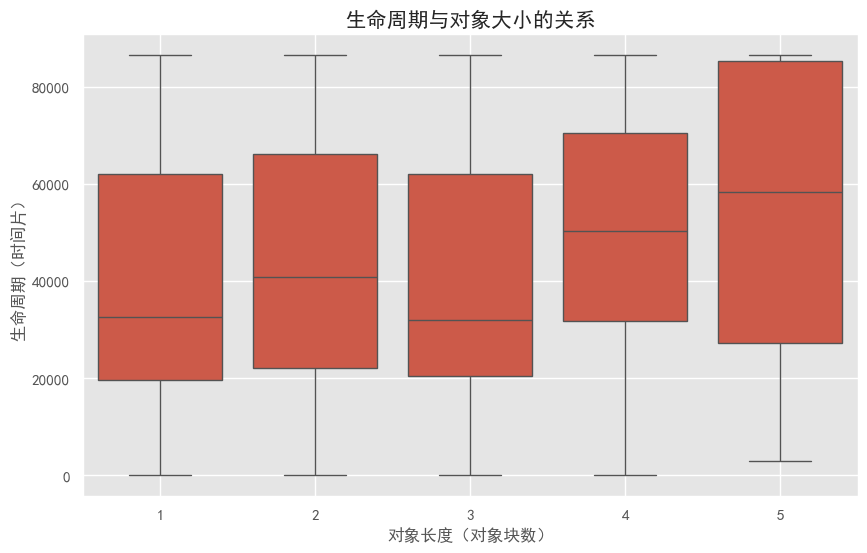

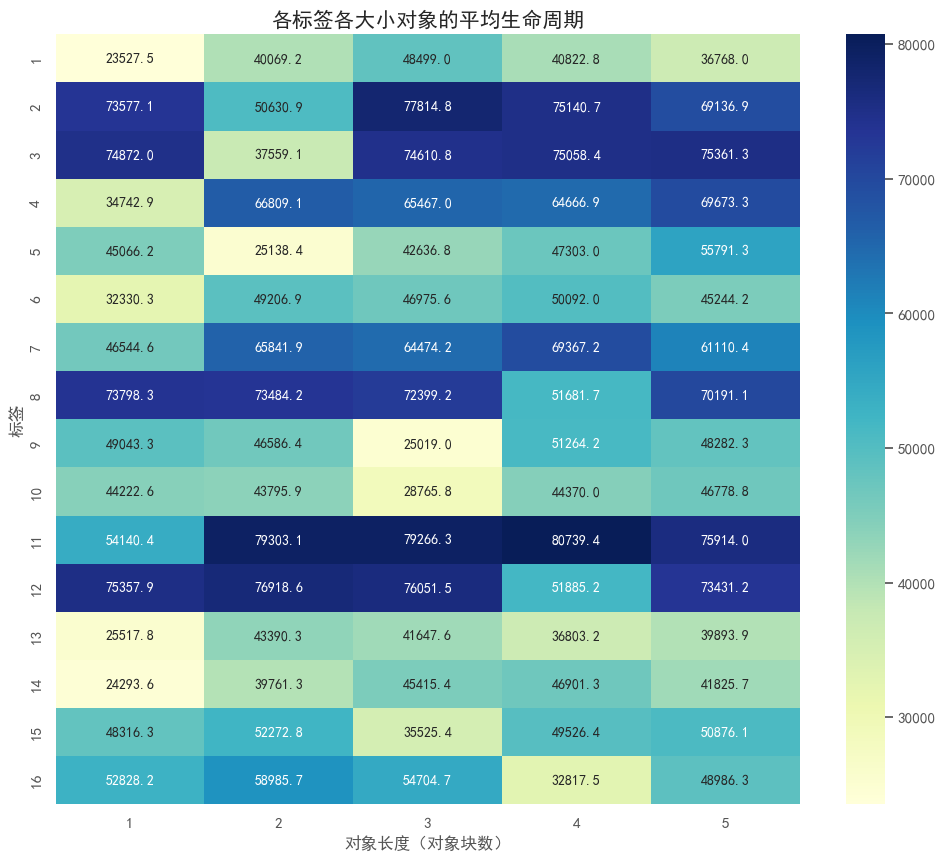

In [10]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制生命周期与对象大小的关系图
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='lifecycle', data=df_lifecycle)
plt.title('生命周期与对象大小的关系', fontsize=15)
plt.xlabel('对象长度（对象块数）', fontsize=12)
plt.ylabel('生命周期（时间片）', fontsize=12)
plt.grid(True)
# plt.savefig('lifecycle_vs_size.png', dpi=300, bbox_inches='tight')
plt.show()

# 按标签和对象大小分组，计算平均生命周期
size_tag_avg_lifecycle = df_lifecycle.groupby(['tag', 'size'])['lifecycle'].mean().reset_index()

# 创建热力图
pivot_table = size_tag_avg_lifecycle.pivot(index='tag', columns='size', values='lifecycle')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('各标签各大小对象的平均生命周期', fontsize=15)
plt.xlabel('对象长度（对象块数）', fontsize=12)
plt.ylabel('标签', fontsize=12)
# plt.savefig('tag_size_lifecycle_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 随时间各标签的文件状态变化

统计各个标签随时间的未删除文件数量、新增文件数量和删除文件数量。

每个标签的最大活跃文件大小：
标签 1: 736 个对象块
标签 2: 1766 个对象块
标签 3: 2138 个对象块
标签 4: 1190 个对象块
标签 5: 1403 个对象块
标签 6: 1094 个对象块
标签 7: 1218 个对象块
标签 8: 2993 个对象块
标签 9: 1816 个对象块
标签 10: 1562 个对象块
标签 11: 1511 个对象块
标签 12: 3158 个对象块
标签 13: 793 个对象块
标签 14: 766 个对象块
标签 15: 2075 个对象块
标签 16: 1490 个对象块

每个标签的最大活跃文件大小占比：
标签 1: 2.86%
标签 2: 6.87%
标签 3: 8.32%
标签 4: 4.63%
标签 5: 5.46%
标签 6: 4.26%
标签 7: 4.74%
标签 8: 11.64%
标签 9: 7.06%
标签 10: 6.08%
标签 11: 5.88%
标签 12: 12.28%
标签 13: 3.08%
标签 14: 2.98%
标签 15: 8.07%
标签 16: 5.80%
[0.02862, 0.06869, 0.08316, 0.04628, 0.05457, 0.04255, 0.04737, 0.11641, 0.07063, 0.06075, 0.05877, 0.12283, 0.03084, 0.02979, 0.08071, 0.05795]


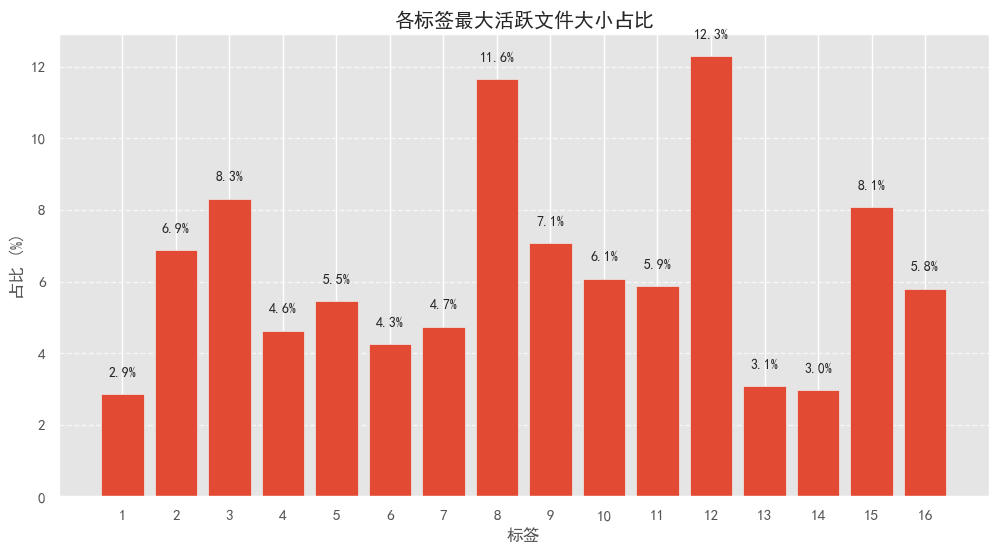

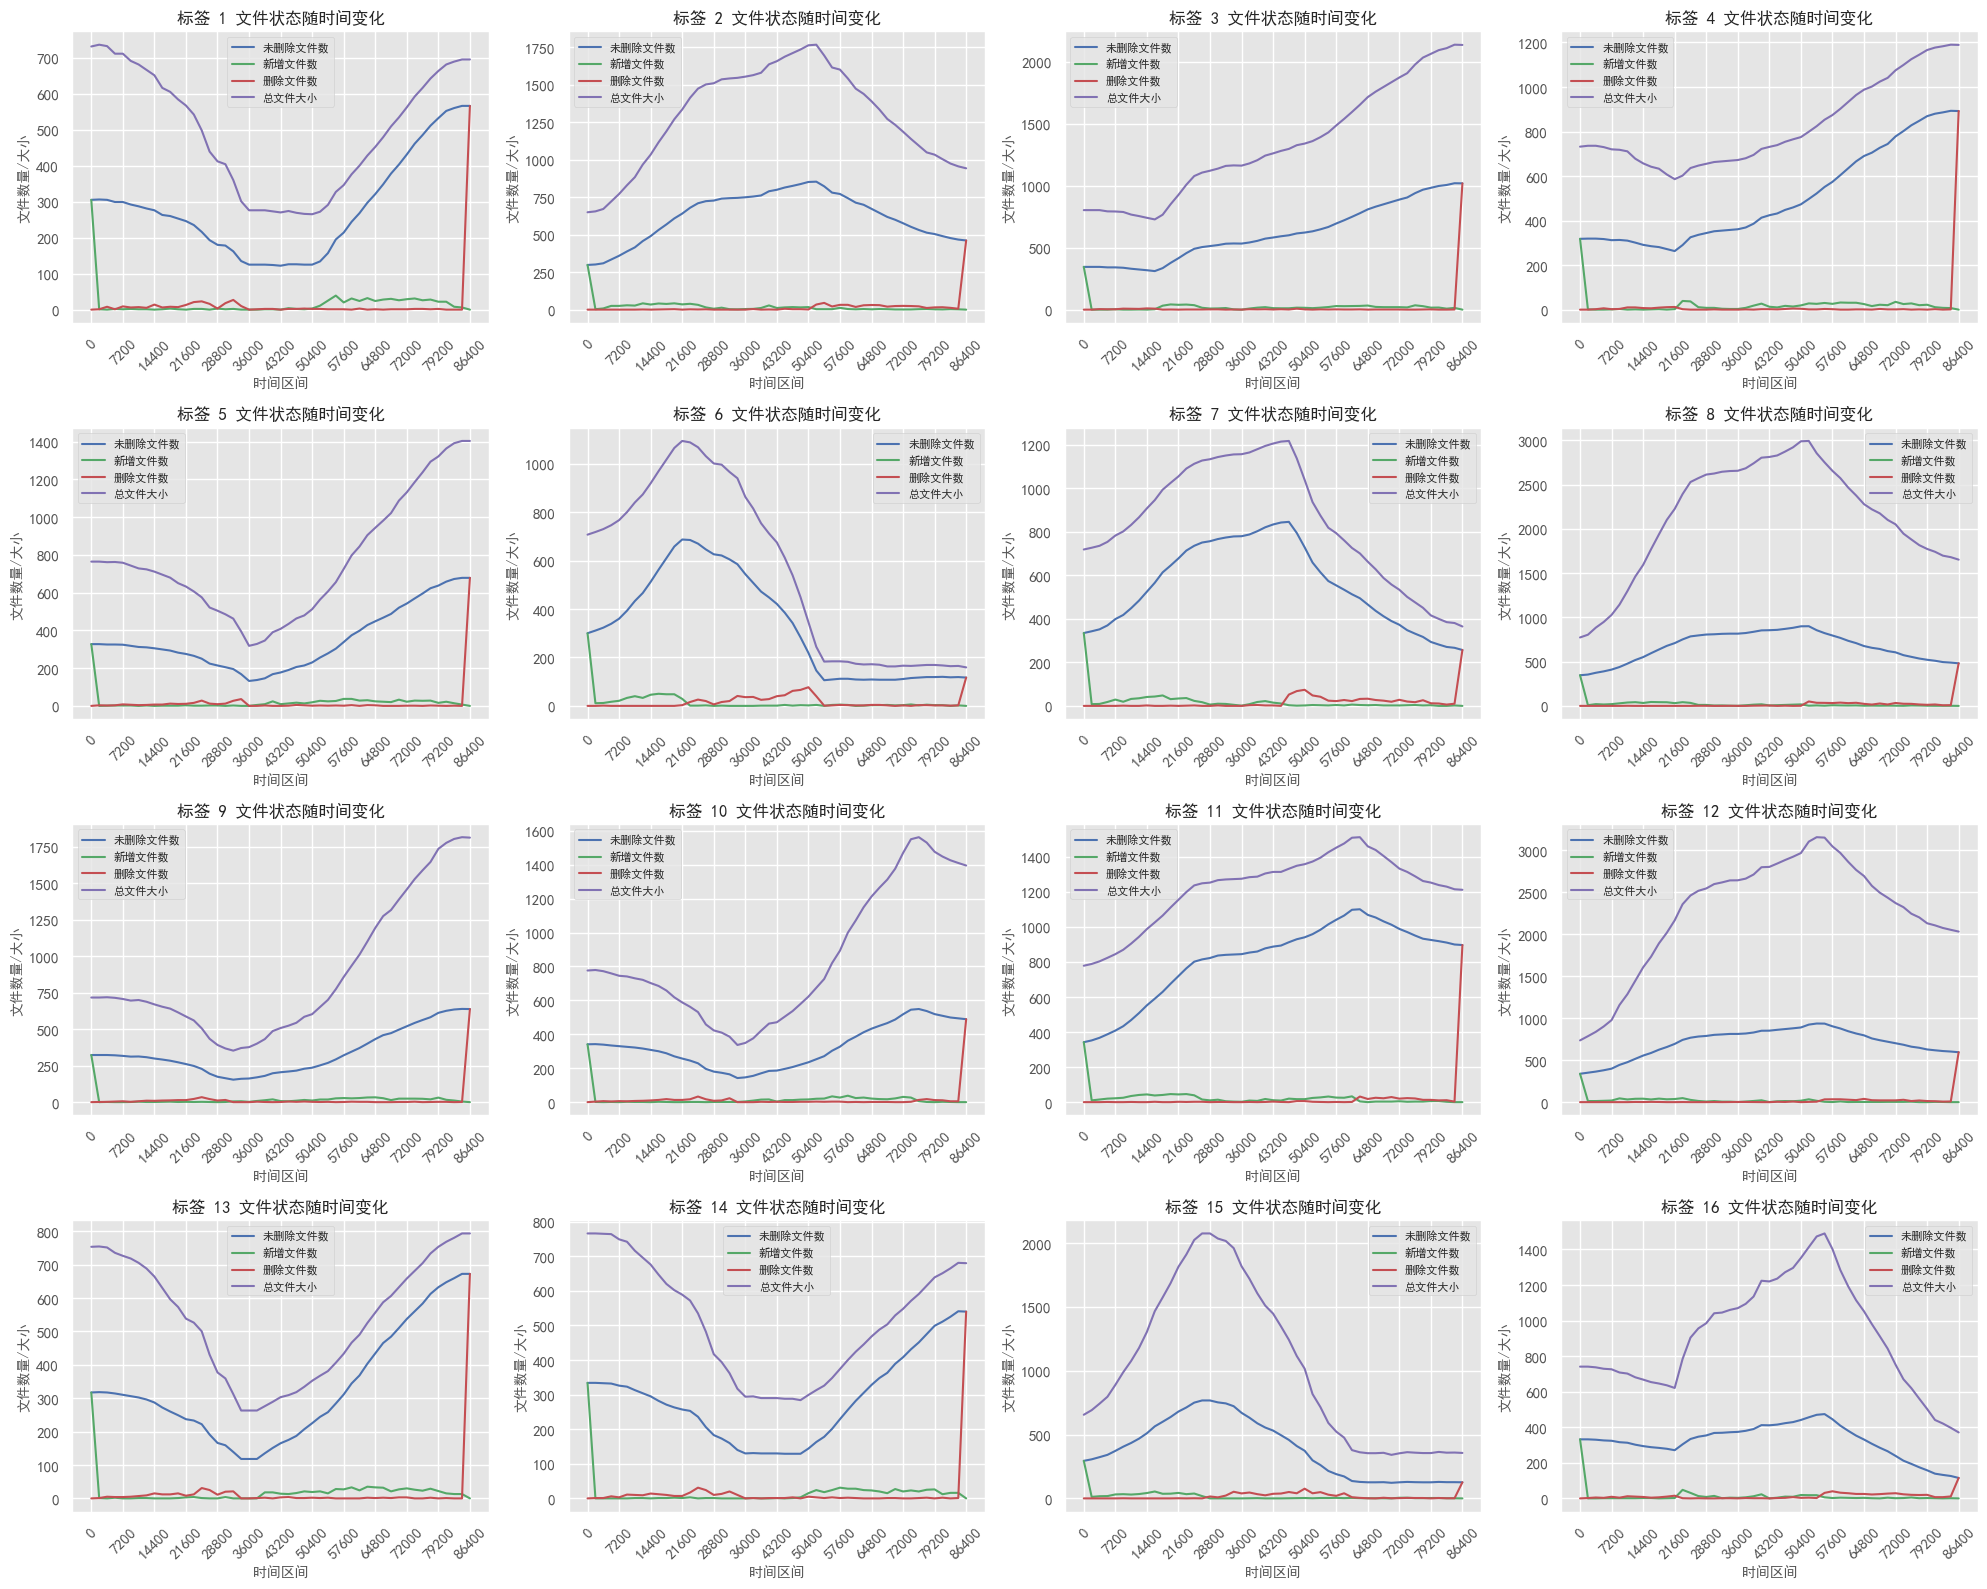

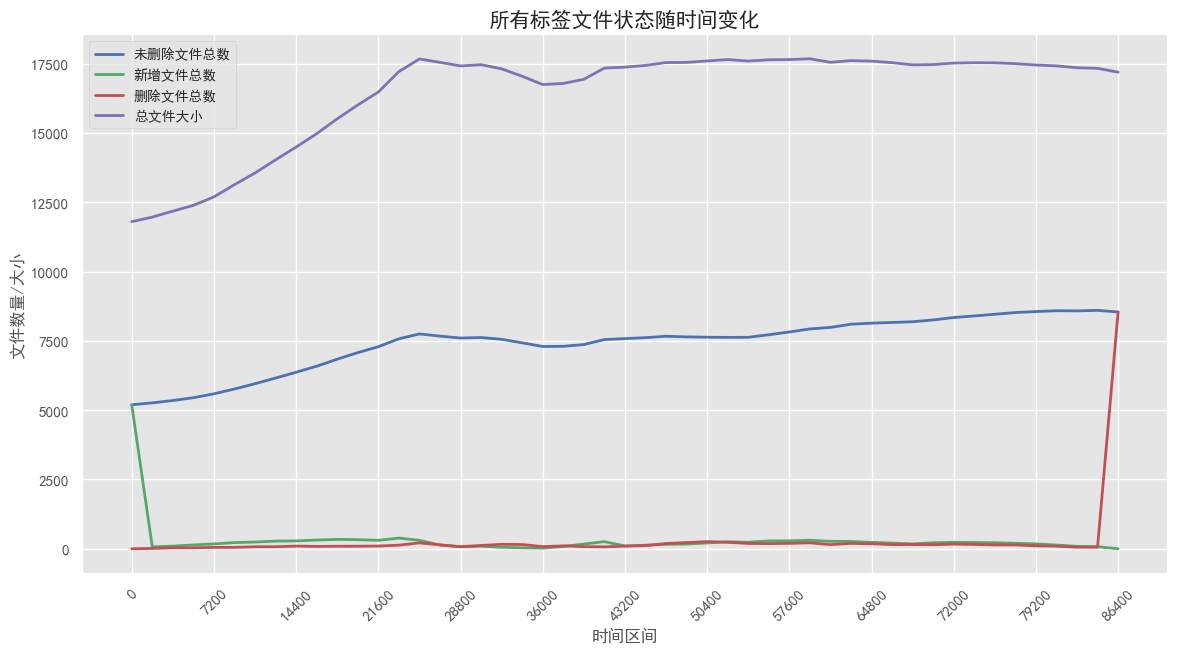

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义时间区间（沿用之前的区间定义）
interval_size = 1800
num_intervals = (T + 105) // interval_size + 1
intervals = [(i*interval_size, min((i+1)*interval_size, T+105)) for i in range(num_intervals)]

# 初始化数据结构
tag_intervals = {tag: {i: {'active': 0, 'new': 0, 'deleted': 0, 'total_size': 0} for i in range(num_intervals)} for tag in range(1, M+1)}
all_intervals = {i: {'active': 0, 'new': 0, 'deleted': 0, 'total_size': 0} for i in range(num_intervals)}


# 计算每个时间区间内各标签的文件状态
for obj_id, obj_info in objects.items():
    birth = obj_info['birth']
    death = obj_info['death']
    tag = obj_info['tag']
    size = obj_info['size']
    
    # 计算对象创建和删除所在的区间
    birth_interval = birth // interval_size
    death_interval = death // interval_size if death is not None else num_intervals - 1
    
    # 记录新增文件
    if birth_interval < num_intervals:
        tag_intervals[tag][birth_interval]['new'] += 1
        all_intervals[birth_interval]['new'] += 1
    
    # 记录删除文件
    if death_interval < num_intervals and death is not None:
        tag_intervals[tag][death_interval]['deleted'] += 1
        all_intervals[death_interval]['deleted'] += 1
    
    # 更新每个区间的活跃文件数
    for i in range(birth_interval, min(death_interval + 1, num_intervals)):
        tag_intervals[tag][i]['active'] += 1
        all_intervals[i]['active'] += 1
        tag_intervals[tag][i]['total_size'] += size
        all_intervals[i]['total_size'] += size

# 统计每个标签的最大活跃文件大小
max_active_size_by_tag = {}
for tag in range(1, M+1):
    max_active_size = max([tag_intervals[tag][interval]['total_size'] for interval in range(num_intervals)])
    max_active_size_by_tag[tag] = max_active_size

# 打印每个标签的最大活跃文件大小
print("每个标签的最大活跃文件大小：")
for tag, max_size in max_active_size_by_tag.items():
    print(f"标签 {tag}: {max_size} 个对象块")
# 打印比例
# 计算所有标签的最大活跃文件大小总和
total_max_active_size = sum(max_active_size_by_tag.values())

# 打印每个标签的最大活跃文件大小占比
print("\n每个标签的最大活跃文件大小占比：")
for tag, max_size in max_active_size_by_tag.items():
    percentage = (max_size / total_max_active_size) * 100 if total_max_active_size > 0 else 0
    print(f"标签 {tag}: {percentage:.2f}%")

# 可视化标签占比
plt.figure(figsize=(12, 6))
tags = list(max_active_size_by_tag.keys())
sizes = list(max_active_size_by_tag.values())
percentages = [(size / total_max_active_size)*1e5//1/1e5 for size in sizes]
print(str(percentages))
percentages = [_*100 for _ in percentages]


plt.bar(tags, percentages)
plt.xlabel('标签')
plt.ylabel('占比 (%)')
plt.title('各标签最大活跃文件大小占比')
plt.xticks(tags)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, p in enumerate(percentages):
    plt.text(tags[i], p + 0.5, f'{p:.1f}%', ha='center')

plt.show()


# 准备可视化数据
interval_labels = [f"{i*interval_size}" for i in range(num_intervals)]
x = list(range(num_intervals))

# 为每个标签创建图表
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for i in range(1, M+1):
    active_counts = [tag_intervals[i][interval]['active'] for interval in range(num_intervals)]
    new_counts = [tag_intervals[i][interval]['new'] for interval in range(num_intervals)]
    deleted_counts = [tag_intervals[i][interval]['deleted'] for interval in range(num_intervals)]
    total_size = [tag_intervals[i][interval]['total_size'] for interval in range(num_intervals)]
    
    ax = axs[i-1]
    ax.plot(x, active_counts, 'b-', label='未删除文件数')
    ax.plot(x, new_counts, 'g-', label='新增文件数')
    ax.plot(x, deleted_counts, 'r-', label='删除文件数')
    ax.plot(x, total_size, 'm-', label='总文件大小')
    
    ax.set_title(f'标签 {i} 文件状态随时间变化', fontsize=12)
    ax.set_xlabel('时间区间', fontsize=10)
    ax.set_ylabel('文件数量/大小', fontsize=10)
    ax.legend(loc='best', fontsize=8)
    ax.grid(True)
    
    # 设置x轴标签，但只显示部分以避免拥挤
    if num_intervals > 10:
        step = num_intervals // 10
        ax.set_xticks(x[::step])
        ax.set_xticklabels(interval_labels[::step], rotation=45)
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(interval_labels, rotation=45)

plt.tight_layout()
# plt.savefig('tag_file_status_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# 创建所有标签总体图表
plt.figure(figsize=(14, 7))
active_counts = [all_intervals[interval]['active'] for interval in range(num_intervals)]
new_counts = [all_intervals[interval]['new'] for interval in range(num_intervals)]
deleted_counts = [all_intervals[interval]['deleted'] for interval in range(num_intervals)]
total_size = [all_intervals[interval]['total_size'] for interval in range(num_intervals)]

plt.plot(x, active_counts, 'b-', linewidth=2, label='未删除文件总数')
plt.plot(x, new_counts, 'g-', linewidth=2, label='新增文件总数')
plt.plot(x, deleted_counts, 'r-', linewidth=2, label='删除文件总数')
plt.plot(x, total_size, 'm-', linewidth=2, label='总文件大小')

plt.title('所有标签文件状态随时间变化', fontsize=15)
plt.xlabel('时间区间', fontsize=12)
plt.ylabel('文件数量/大小', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)

if num_intervals > 10:
    step = num_intervals // 10
    plt.xticks(x[::step], interval_labels[::step], rotation=45)
else:
    plt.xticks(x, interval_labels, rotation=45)

# plt.savefig('all_file_status_over_time.png', dpi=300, bbox_inches='tight')
plt.show()



## 读取文件时文件的存在时间分布

分析在读取操作发生时，文件已经存在的时间分布。

读取文件时文件存在时间统计：
count    8.603463e+06
mean     3.094473e+04
std      2.168603e+04
min      0.000000e+00
25%      1.219800e+04
50%      2.614100e+04
75%      4.968600e+04
max      8.632100e+04
Name: age_at_read, dtype: float64

按标签分组的读取文件存在时间统计：
        count          mean           std  min      25%      50%       75%  \
tag                                                                          
1    632939.0  28896.735000  17125.382906  0.0  14495.0  25515.0  45603.00   
2    721034.0  39622.476948  23598.168548  0.0  16900.0  42296.0  59955.00   
3    474562.0  30506.617125  22751.204286  0.0  13956.0  21645.0  41312.75   
4    731828.0  32360.715361  24766.095960  0.0   9730.0  25081.0  57953.00   
5    440481.0  25574.782651  16907.557674  0.0  13442.0  20814.0  43382.00   
6    477781.0  18939.067870  16891.771029  0.0   7917.0  13900.0  20990.00   
7    325847.0  22106.062459  16453.222685  0.0  10287.0  17325.0  30410.00   
8    372270.0  39933.881830  18724.842614  1.0  25429.

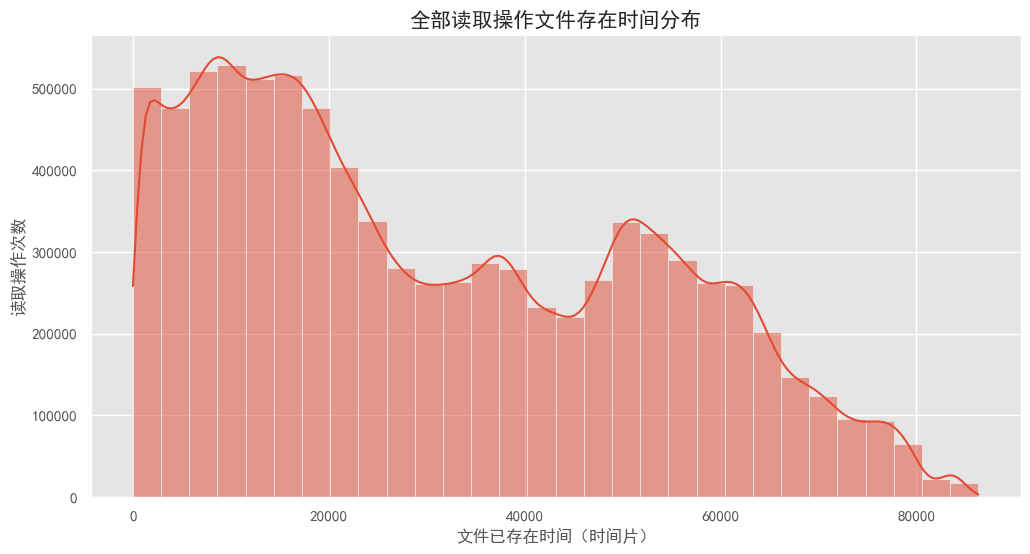

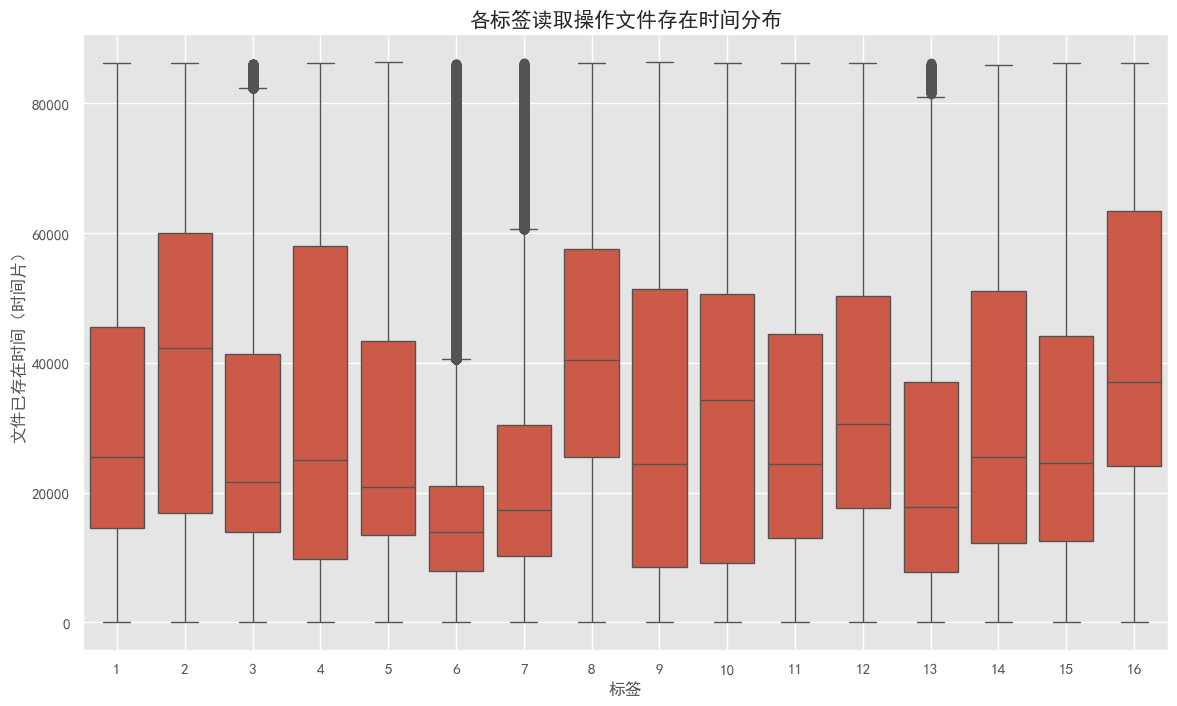

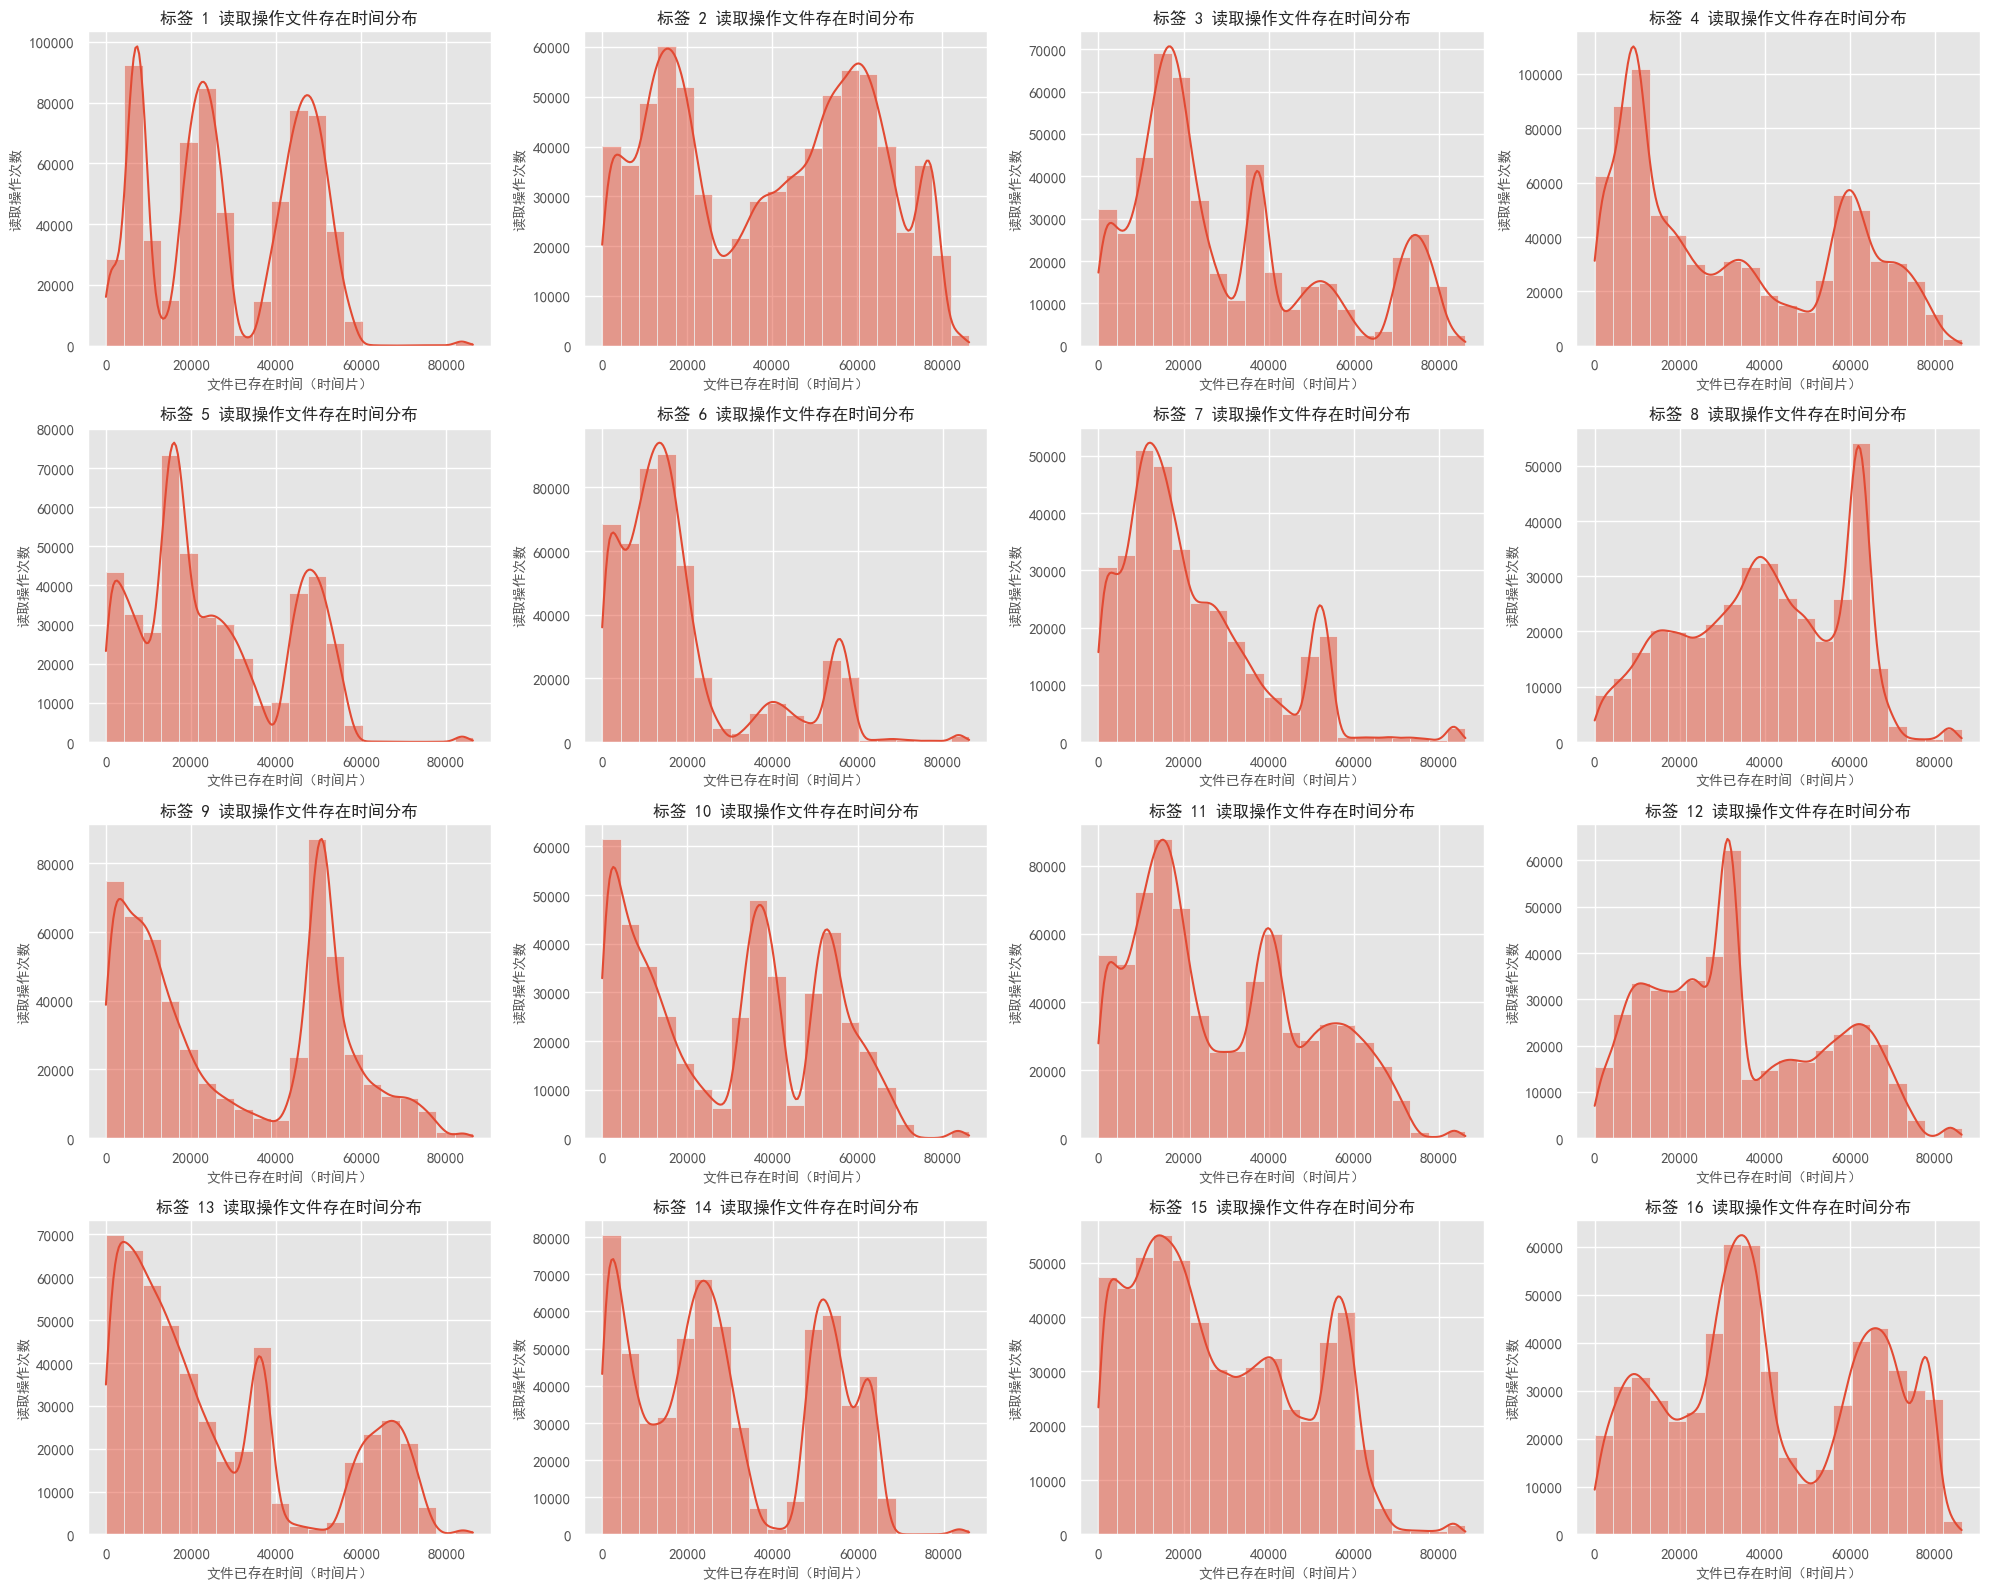

e:\APP\code\Miniconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


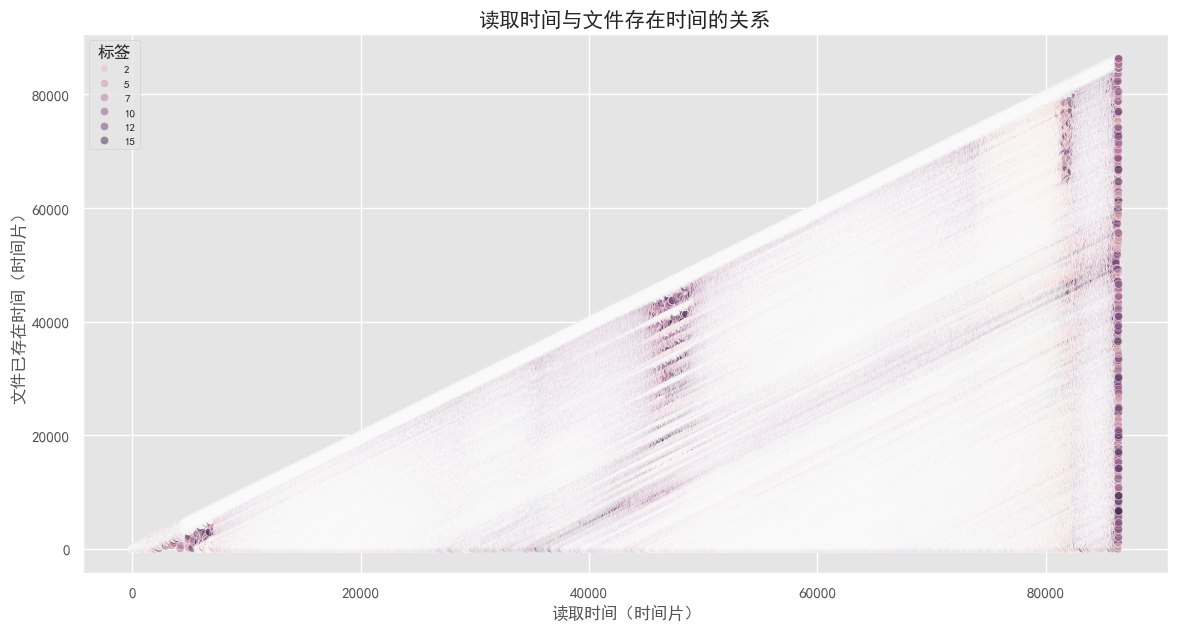

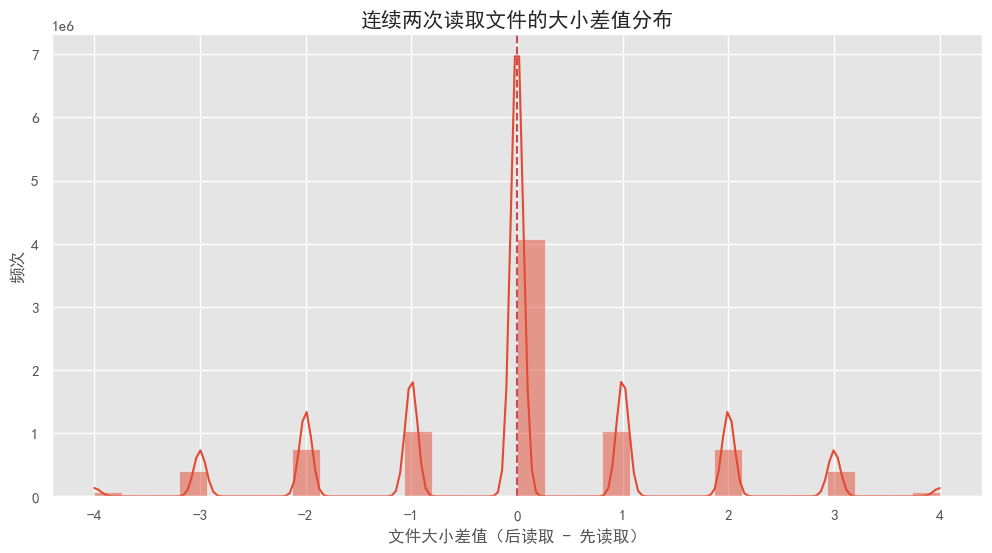

大小差值为 -10 的数量: 1390
大小差值为 -9 的数量: 1036
大小差值为 -8 的数量: 2236
大小差值为 -7 的数量: 1436
大小差值为 -6 的数量: 1412
大小差值为 -5 的数量: 999
大小差值为 -4 的数量: 1752
大小差值为 -3 的数量: 1680
大小差值为 -2 的数量: 1316
大小差值为 -1 的数量: 841
大小差值为 0 的数量: 1064703
大小差值为 1 的数量: 900
大小差值为 2 的数量: 1280
大小差值为 3 的数量: 1529
大小差值为 4 的数量: 1973
大小差值为 5 的数量: 1141
大小差值为 6 的数量: 1496
大小差值为 7 的数量: 1305
大小差值为 8 的数量: 2042
大小差值为 9 的数量: 1137
大小差值为 10 的数量: 1763


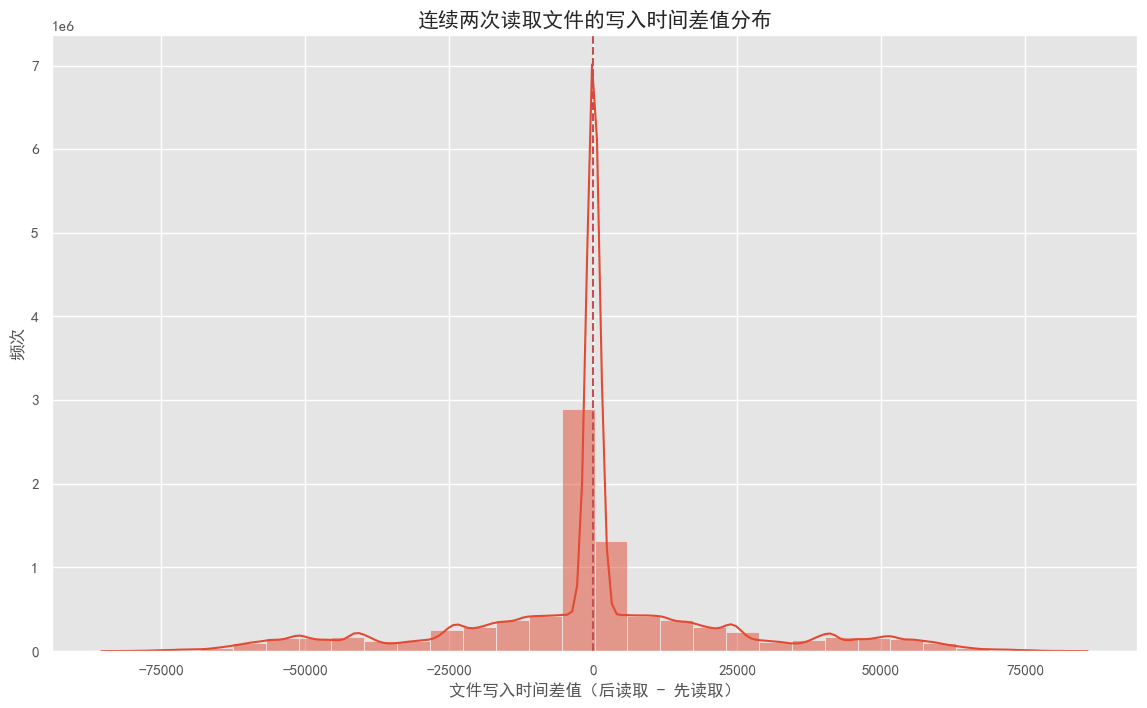

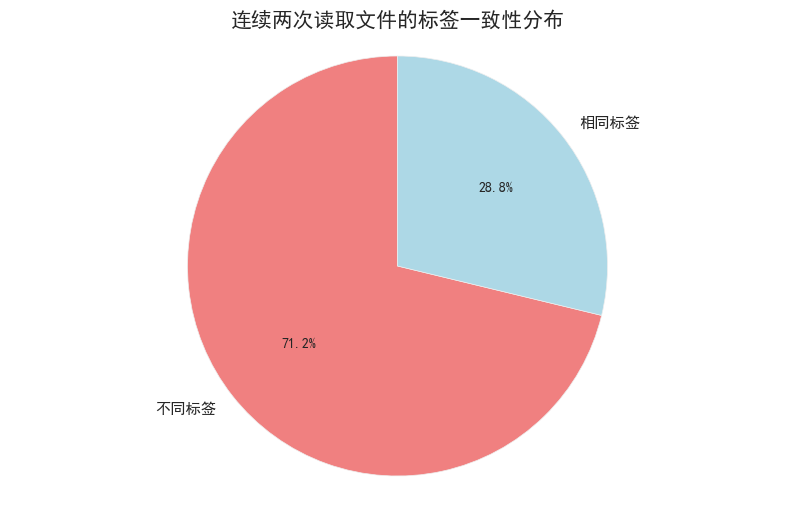

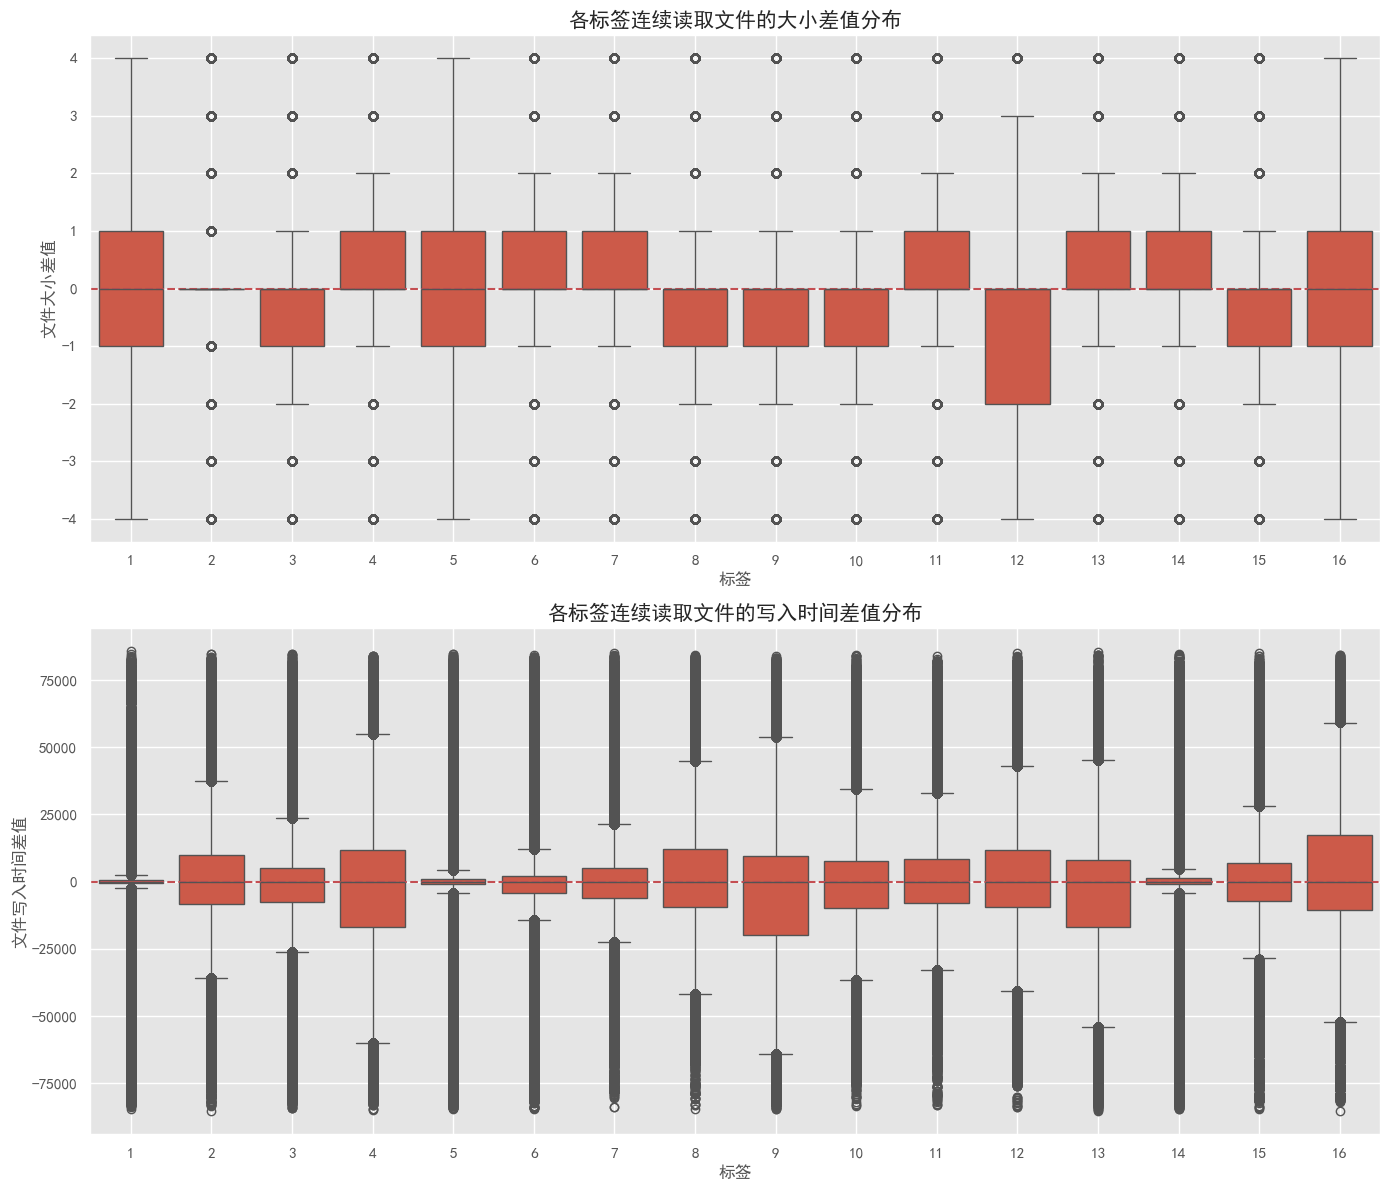

In [12]:

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 计算读取操作时文件的存在时间
read_age_data = []

for timestamp, operation, obj_id, _, tag in object_operations:
    if operation == 'read' and obj_id in objects:
        birth_time = objects[obj_id]['birth']
        age_at_read = timestamp - birth_time
        
        read_age_data.append({
            'obj_id': obj_id,
            'tag': tag,
            'age_at_read': age_at_read,
            'timestamp': timestamp,
            'size': objects[obj_id]['size']  # 添加文件大小信息
        })

# 转换为DataFrame
df_read_age = pd.DataFrame(read_age_data)

# 计算基本统计信息
print("读取文件时文件存在时间统计：")
print(df_read_age['age_at_read'].describe())

# 按标签分组统计
tag_read_age_stats = df_read_age.groupby('tag')['age_at_read'].describe()
print("\n按标签分组的读取文件存在时间统计：")
print(tag_read_age_stats)

# 绘制整体分布
plt.figure(figsize=(12, 6))
sns.histplot(df_read_age['age_at_read'], bins=30, kde=True)
plt.title('全部读取操作文件存在时间分布', fontsize=15)
plt.xlabel('文件已存在时间（时间片）', fontsize=12)
plt.ylabel('读取操作次数', fontsize=12)
plt.grid(True)
# plt.savefig('all_read_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 绘制各标签分布的箱型图
plt.figure(figsize=(14, 8))
sns.boxplot(x='tag', y='age_at_read', data=df_read_age)
plt.title('各标签读取操作文件存在时间分布', fontsize=15)
plt.xlabel('标签', fontsize=12)
plt.ylabel('文件已存在时间（时间片）', fontsize=12)
plt.grid(True)
# plt.savefig('tag_read_age_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 为每个标签绘制分布
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for i in range(1, M+1):
    tag_data = df_read_age[df_read_age['tag'] == i]
    if not tag_data.empty:
        sns.histplot(tag_data['age_at_read'], bins=20, kde=True, ax=axs[i-1])
        axs[i-1].set_title(f'标签 {i} 读取操作文件存在时间分布', fontsize=12)
        axs[i-1].set_xlabel('文件已存在时间（时间片）', fontsize=10)
        axs[i-1].set_ylabel('读取操作次数', fontsize=10)
        axs[i-1].grid(True)
    else:
        axs[i-1].set_title(f'标签 {i} 无读取操作', fontsize=12)
        axs[i-1].grid(True)

plt.tight_layout()
# plt.savefig('tag_read_age_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 分析读取时间与文件存在时间的关系
plt.figure(figsize=(14, 7))
sns.scatterplot(x='timestamp', y='age_at_read', hue='tag', data=df_read_age, alpha=0.5)
plt.title('读取时间与文件存在时间的关系', fontsize=15)
plt.xlabel('读取时间（时间片）', fontsize=12)
plt.ylabel('文件已存在时间（时间片）', fontsize=12)
plt.legend(title='标签', fontsize=8)
plt.grid(True)
# plt.savefig('read_time_vs_age.png', dpi=300, bbox_inches='tight')
plt.show()

# 统计两次连续读取文件之间的差异
# 按时间戳排序
df_read_age = df_read_age.sort_values('timestamp')

# 创建移位数据以比较连续读取
df_read_age['next_obj_id'] = df_read_age['obj_id'].shift(-1)
df_read_age['next_size'] = df_read_age['size'].shift(-1)
df_read_age['next_tag'] = df_read_age['tag'].shift(-1)
df_read_age['next_birth'] = df_read_age['timestamp'] - df_read_age['age_at_read']
df_read_age['next_next_birth'] = df_read_age['next_birth'].shift(-1)

# 计算差值
df_read_age['size_diff'] = df_read_age['next_size'] - df_read_age['size']
df_read_age['birth_time_diff'] = df_read_age['next_next_birth'] - df_read_age['next_birth']
df_read_age['same_tag'] = df_read_age['next_tag'] == df_read_age['tag']

# 移除最后一行（没有下一个读取操作）
df_consecutive_reads = df_read_age.dropna(subset=['next_obj_id'])

# 1. 文件大小差值分布（区分正负）
plt.figure(figsize=(12, 6))
sns.histplot(df_consecutive_reads['size_diff'], bins=30, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('连续两次读取文件的大小差值分布', fontsize=15)
plt.xlabel('文件大小差值（后读取 - 先读取）', fontsize=12)
plt.ylabel('频次', fontsize=12)
plt.grid(True)
plt.show()

# 2. 文件写入时间差值分布（区分正负）
# 打印出差值为-10-10之间的数量
size_diff_range = range(-10, 11)
for diff in size_diff_range:
    count = len(df_consecutive_reads[df_consecutive_reads['birth_time_diff'] == diff])
    print(f"大小差值为 {diff} 的数量: {count}")



plt.figure(figsize=(14, 8))
sns.histplot(df_consecutive_reads['birth_time_diff'], bins=30, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('连续两次读取文件的写入时间差值分布', fontsize=15)
plt.xlabel('文件写入时间差值（后读取 - 先读取）', fontsize=12)
plt.ylabel('频次', fontsize=12)
plt.grid(True)
plt.show()

# 3. 文件标签是否一致分布
plt.figure(figsize=(10, 6))
tag_match_counts = df_consecutive_reads['same_tag'].value_counts()
plt.pie(tag_match_counts, labels=['不同标签', '相同标签'] if False in tag_match_counts.index else ['相同标签'],
        autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('连续两次读取文件的标签一致性分布', fontsize=15)
plt.axis('equal')
plt.show()

# 按标签分析大小差值和写入时间差值
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# 按标签分析大小差值
sns.boxplot(x='tag', y='size_diff', data=df_consecutive_reads, ax=axs[0])
axs[0].set_title('各标签连续读取文件的大小差值分布', fontsize=15)
axs[0].set_xlabel('标签', fontsize=12)
axs[0].set_ylabel('文件大小差值', fontsize=12)
axs[0].grid(True)
axs[0].axhline(y=0, color='r', linestyle='--')

# 按标签分析写入时间差值
sns.boxplot(x='tag', y='birth_time_diff', data=df_consecutive_reads, ax=axs[1])
axs[1].set_title('各标签连续读取文件的写入时间差值分布', fontsize=15)
axs[1].set_xlabel('标签', fontsize=12)
axs[1].set_ylabel('文件写入时间差值', fontsize=12)
axs[1].grid(True)
axs[1].axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

In [13]:
# 磁盘点
import time


class Cell:
    # req_id: 请求ID; obj_id: 对象ID; unit_id: 单元ID; tag: 标签
    __slots__ = ['req_ids', 'obj_id', 'unit_id', 'tag']
    def __init__(self):
        self.req_ids = set()
        self.obj_id = 0 # 0 表示空闲
        self.unit_id = 0
        self.tag = 0
    # 释放
    def free(self):
        self.req_ids.clear()
        self.obj_id = 0
        self.unit_id = 0
        self.tag = 0
    # 占用
    def occupy(self, obj_id:int, unit_id:int):
        self.obj_id = obj_id
        self.unit_id = unit_id

cells = [[Cell() for _ in range(6000)] for _ in range(10)]

time_start = time.time()
a = [0,0]
for i in range(80000):
    print(time.time()-time_start)
    for j in range(10):
        for cell in cells[j]:
            cell.obj_id = cell.tag+cell.unit_id
        
time_end = time.time()
print(time_end - time_start)


0.0
0.006966829299926758
0.02176833152770996
0.0316312313079834
0.04530191421508789
0.055325984954833984
0.0633687973022461
0.07136869430541992
0.07887864112854004
0.0851905345916748
0.09559059143066406
0.1049032211303711
0.11101579666137695
0.1234581470489502
0.1288919448852539
0.13927388191223145
0.1476733684539795
0.15251636505126953
0.16218948364257812
0.17113757133483887
0.17865538597106934
0.1859142780303955
0.19628381729125977
0.20131421089172363
0.2116997241973877
0.216780424118042
0.22702836990356445
0.23537826538085938
0.24269509315490723
0.25241613388061523
0.2687389850616455
0.280867338180542
0.291964054107666
0.300534725189209
0.31240391731262207
0.322129487991333
0.33252763748168945
0.34432029724121094
0.35309815406799316
0.3571162223815918
0.367382287979126
0.37200093269348145
0.3822495937347412
0.38736939430236816
0.3925137519836426
0.40337443351745605
0.4079267978668213
0.4181172847747803
0.4284322261810303
0.4373900890350342
0.44545769691467285
0.45488929748535156
0.4